# Решение задачи регрессии "Популярность песен".

## 1. Подготовка данных

Задача регрессии - предсказать значение на основе нескольких признаков.

Для решения задачи сначала необходимо импортировать соответствующие библиотеки.
* **Numpy** - используется для выполнения линейных алгебраических вычислений.
* **Pandas** - используется для работы с данными и их обработкой. Конкретно мы работаем с типом данных **DataFrame**.
* **Matplotlib.pyplot** - используется для отрисовки графиков.
* **Seaborn** - также используется для отрисовки графиков.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
for dirname, _, filenames in os.walk('kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings('ignore')

kaggle/input\song-popularity\dataset.csv


Прочитаем датасет.

In [2]:
data = pd.read_csv('kaggle/input/song-popularity/dataset.csv')

Перечислим колонки в датасете и узнаем, что они означают.
* **Track_id** - идентификатор песни. Является случайным набором цифер и латинских букв.
* **Artists** - имена или псевдонимы артистов, работавших над песней. Если их несколько, то они указываются через `;`. Является текстом.
* **Album_name** - название альбома, из которого была взята композиция. Является текстом.
* **Track_name** - наименование песни. Является текстом.
* **Popularity** - индекс популярности песни, может принимать значения целых чисел от 0 до 100 включительно. `Именно это значение нужно будет предсказать`.
* **Duration_ms** - длина песни в миллисекундах, является целым числом.
* **Explicit** - булевское значение, показывающее, присутствует ли в песне нецензурная брань или откровенные темы. `True` - присутствует, `False` - не присутсвует.
* **Danceability** - показатель того, насколько песня подходит для танцев. Принимает значение в виде десятичной дроби от 0 до 1.
* **Energy** - показатель энергичности песни. Принимает значение в виде десятичной дроби от 0 до 1.
* **Key** - тональность песни. Является значением в виде целого числа от 0 до 11 включительно.
* **Loudness** - показатель громкости песни. Принимает значение в виде десятичной дроби.
* **Mode** - режим аудиозаписи. Принимает значения либо 0, либо 1.
* **Speechiness** - показатель красноречивости текста в песне. Принимает значение в виде десятичной дроби от 0 до 1.
* **Acousticness** - показатель звучания песни, оценивает качество звука. Принимает значение в виде десятичной дроби от 0 до 1.
* **Instrumentalness** - показатель звучания инструментов в песне. Принимает значение в виде десятичной дроби от 0 до 1.
* **Liveness** - показатель живости песни. Принимает значение в виде десятичной дроби от 0 до 1.
* **Valence** - валентность песни, означает привлекательность звуков для человеческого слуха. Принимает значение в виде десятичной дроби от 0 до 1.
* **Tempo** - темп песни, указыватся в BPM (удары в минуту). Принимает значение в виде десятичной дроби.
* **Time_signature** - размер такта, указывает, сколько ударов приходится на каждый такт песни. Указывается в виде целого числа от 0 до 4.
* **Track-genre** - жанр песни. Является текстом.

In [3]:
data

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


Выведем информацию о датасете.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

Мы видим, что в датасете представлено 114000 песен, что является большим количеством данных.

---

## 2. Избавление от пропусков

Для начала стоит отметить, что первый столбец `Unnamed: 0` дублирует индексы строк таблицы, потому его можно удалить.

In [5]:
data = data.drop(data.columns[0], axis=1)
data

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


---

### 2.1 Избавление от пропусков.

Теперь обратим внимания на пропуски. Узнаем, в каких столбцах они есть.

In [6]:
data.isnull().sum()

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

Видим, что пропуски есть в колонках `artists`, `album_name` и `track_name`. Выведем информацию о строке, содержащей их.

In [7]:
i = 0
for artist in data['artists']:
    i+=1
    if not isinstance(artist, str):
        print(artist, i)
data.iloc[65900]

nan 65901


track_id            1kR4gIb7nGxHPI3D2ifs59
artists                                NaN
album_name                             NaN
track_name                             NaN
popularity                               0
duration_ms                              0
explicit                             False
danceability                         0.501
energy                               0.583
key                                      7
loudness                             -9.46
mode                                     0
speechiness                         0.0605
acousticness                          0.69
instrumentalness                   0.00396
liveness                            0.0747
valence                              0.734
tempo                              138.391
time_signature                           4
track_genre                          k-pop
Name: 65900, dtype: object

Видим, что у этой строки отсутствует значение в наименовании артиста, в названии альбома и названии песни. То есть, мы эту строку можем удалить.

In [8]:
data = data.dropna()

Теперь посмотрим, остались ли пропуски.

In [9]:
data.isnull().sum()

track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

Видим, что пропусков больше нет. Осталось поменять значение в колонке `explicit`.

---

Заметим, что колонка `explicit` содержит булевские значения. Для модели машинного обучения будет удобнее, если в этой колонке значения будут представлены целыми числами. Переведём булевские значения в целочисленный тип.

In [9]:
data['explicit'] = data['explicit'].astype('int64')
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          113999 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        113999 non-null  int64  
 5   duration_ms       113999 non-null  int64  
 6   explicit          113999 non-null  int64  
 7   danceability      113999 non-null  float64
 8   energy            113999 non-null  float64
 9   key               113999 non-null  int64  
 10  loudness          113999 non-null  float64
 11  mode              113999 non-null  int64  
 12  speechiness       113999 non-null  float64
 13  acousticness      113999 non-null  float64
 14  instrumentalness  113999 non-null  float64
 15  liveness          113999 non-null  float64
 16  valence           113999 

---

## 3. Анализ датасета

### 3.1 Подготовка к анализу

Зададим палитру для графиков.

In [10]:
sns.set(style='whitegrid')
colors = ['#ff6600', '#002eff']

palette = {0: colors[0], 1: colors[1]}

В колонке `durarion_ms` длина песни находится с миллисекундах. Решено перевести время в минуты.  
Для этого мы округляем результат деления значения из `duration_ms` на 60000, а также переименовываем `duration_ms` в `duration_min`.

In [11]:
def change_to_min(x):
    return round(x/60000, 1)
# Меняем длину трека с миллисекунд на минуты
data['duration_ms'] = data['duration_ms'].apply(change_to_min)

# Меняем названия колонок
data = data.rename(columns={'duration_ms' : 'duration_min'})

In [14]:
data['duration_min']

0         3.8
1         2.5
2         3.5
3         3.4
4         3.3
         ... 
113995    6.4
113996    6.4
113997    4.5
113998    4.7
113999    4.0
Name: duration_min, Length: 113999, dtype: float64

---

### 3.2 Матрица корреляции

Для анализа сначала стоит посмотреть на матрицу корреляции. Она будет представлена в виде тепловой карты.  
Так как мы уже закодировали колонки, в которых есть строки, то будем считать корреляцию между теми колонками, которые не кодировались.  

Параметры для heatmap:
* **data** - данные, на которых строится тепловая карта.
* **fmt** - формат надписей в ячейках. `.2f` означает, что после запятой будут идти 2 цифры.
* **annot** - добавляет значения в ячейки при `True`
* **cmap** - устанавливает цветовую схему.
* **ax** - устанавливает оси для тепловой карты.

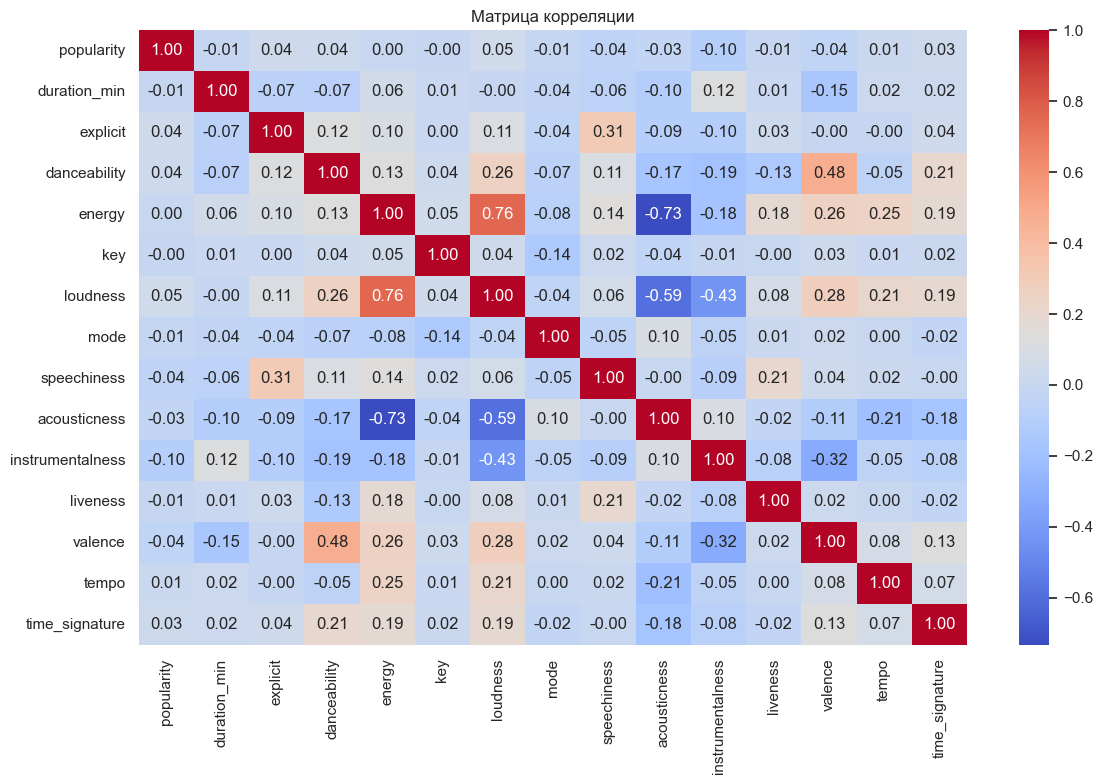

In [12]:
# Датафрейм с незакодированными строками
corr_data = data.loc[:, ['popularity', 'duration_min', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature']]

# Построение тепловой карты корреляции
corr_data_1 = corr_data.corr()
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(data=corr_data_1, fmt='.2f', annot=True, cmap='coolwarm', ax=ax)

plt.title('Матрица корреляции')
plt.tight_layout()
plt.show()

Результаты анализа матрицы корреляции:
1. `speechiness` и `explicit`:  
* Эта корреляция значит, что наличие нецензурной брани в тексте связано с качеством текста. То есть если текст является качественным, то в нём с большей долей вероятности будут нецензурные выражения.  

2. `loudness` и `energy`:  
* Эта корреляция значит, что энергичность музыки напрямую зависит от её громкости: чем музыка громче, тем она энергичнее.

3. `acousticness` и `energy`:  
* Корреляция этих двух признаков говорит о том, что чем музыка качественнее звучит, тем она менее энергична.

4. `valence` и `danceability`:  
* Эта корреляция говорит о том, что чем приятнее слушать музыку, тем более "танцевальная" она.

5. `acousticness` и `loudness`:  
* Это говорит о том, что чем тише музыка, тем более качественный в ней звук.

6. `instrumentalness` и `loudness`:  
* Это говорит о том, что чем тише музыка, тем более качественные в ней инструменты.

7. `valence` и `instrumentalness`:  
* Это говорит о том, что чем приятнее слушать музыку, тем в ней качественнее инструменты.

Отдельно нужно рассмотреть корреляцию с нашей таргетной переменной - `popularity`.

In [13]:
corr_popularity = corr_data_1['popularity'][1:]
corr_popularity


duration_min       -0.007167
explicit            0.044078
danceability        0.035444
energy              0.001053
key                -0.003847
loudness            0.050420
mode               -0.013948
speechiness        -0.044930
acousticness       -0.025458
instrumentalness   -0.095147
liveness           -0.005397
valence            -0.040522
tempo               0.013212
time_signature      0.031076
Name: popularity, dtype: float64

Видим, что `popularity` почти не коррелирует ни с одним из представленных признаков. Это значит, что популярность песни от них почти не зависит.  

**От чего же тогда зависит?** Либо от внешних признаков (реклама, продвижение), либо от закодированных признаков (`artists`, `album_name`, `track_name`, `track_genre`).  
Собственно, это мы проверим в анализе.

---

### 3.3 Анализ и построение гипотез

Попытаемся построить гипотезы.

#### 1. Может быть, чем короче песня, тем она более популярна? 

Для начала посмотрим, как вообще меняется популярность песни в зависимости от её длины.

Создаётся график, где по оси X будет длина песни в минутах, а по оси Y будет Популярность песни. Каждая песня обозначена точкой.

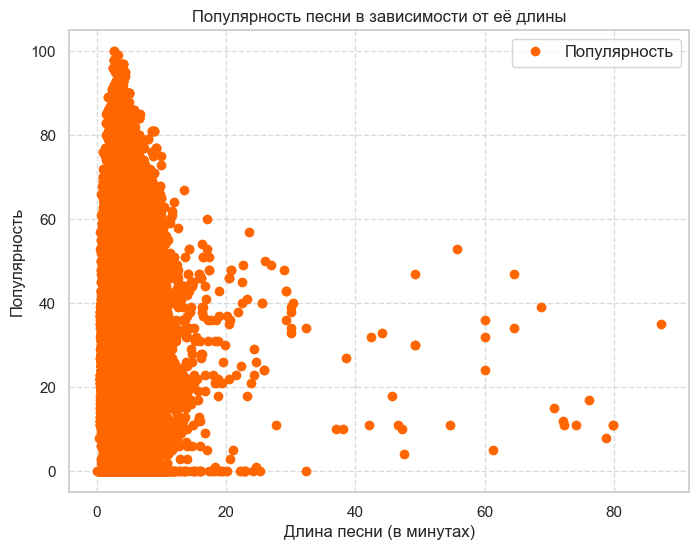

In [14]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.set_style('whitegrid')

# Создание графика
ax.plot(data['duration_min'], data['popularity'], marker='o', linestyle='', color='#ff6600', linewidth=2, label='Популярность')

# Установка сетки
ax.grid(True, linestyle='--', alpha=0.7)

ax.set_xlabel('Длина песни (в минутах)')
ax.set_ylabel('Популярность')
ax.set_title('Популярность песни в зависимости от её длины')

ax.legend(fontsize=12)
plt.show()

Из графика видно, что основаная масса песен имеет длину < 10 минут, а остальные более редки. Соответственно, они не так популярны.

**Вывод:** песни длиной менее 10 минут более популярны. Это логично, так как они менее представлены.

---

#### 2. Популярность песни зависит от жанра.

Для начала поймём, а сколько вообще у нас жанров.

In [15]:
len(data['track_genre'].unique())

114

Так как жанров слишком много, то решено вывести топ 10 самых популярных жанров и топ 10 самых непопулярных жанров.

In [16]:
# Считаем популярность жанров
genre_popularity = list(data.groupby('track_genre')['popularity'].sum())
# Список жанров
genre = list(data['track_genre'].unique())
# Создание словаря популярности жанров {жанр : популярность}
genres={}
for i in range(len(genre_popularity)):
    genre_popularity[i] /= 10000 # Масштабируем популярность для того, чтобы были лучшие графики.
    genres[genre[i]] = genre_popularity[i]

# Отсортируем жанры по убыванию и возрастанию популярности соответственно.
genres_sorted_dec = dict(sorted(genres.items(), key=lambda item: item[1], reverse=True))
genres_sorted_inc = dict(sorted(genres.items(), key=lambda item: item[1], reverse=False))

# Создадим генераторы (нужны для графиков)
from itertools import islice
top_up_10 = islice(genres_sorted_dec.items(), 10)
top_down_10 = islice(genres_sorted_inc.items(), 10)

x_top = list()
y_top = list()
x_down = list()
y_down = list()

**Топ 10 самых популярных жанров.**

In [17]:
for key, value in top_up_10:
    print(f"{key}: {value}")
    x_top.append(key)
    y_top.append(value)

pop: 5.9283
k-pop: 5.6896
chill: 5.3651
sad: 5.2379
grunge: 4.9594
indian: 4.9539
anime: 4.8772
emo: 4.8128
sertanejo: 4.7866
pop-film: 4.7576


**Топ 10 наименее популярных жанров.**

In [18]:
for key, value in top_down_10:
    print(f"{key}: {value}")
    x_down.append(key)
    y_down.append(value)

iranian: 0.221
romance: 0.3245
latin: 0.8297
detroit-techno: 1.1174
chicago-house: 1.2339
classical: 1.3055
jazz: 1.3628
grindcore: 1.4625
kids: 1.4888
idm: 1.5766


Построим графики этих рейтингов.
Это будет столбчатая диаграмма, в которой по оси X будет название жанра, а по оси Y - популярность жанра, делённая на 10000.

Для 10 самых популярных жанров:

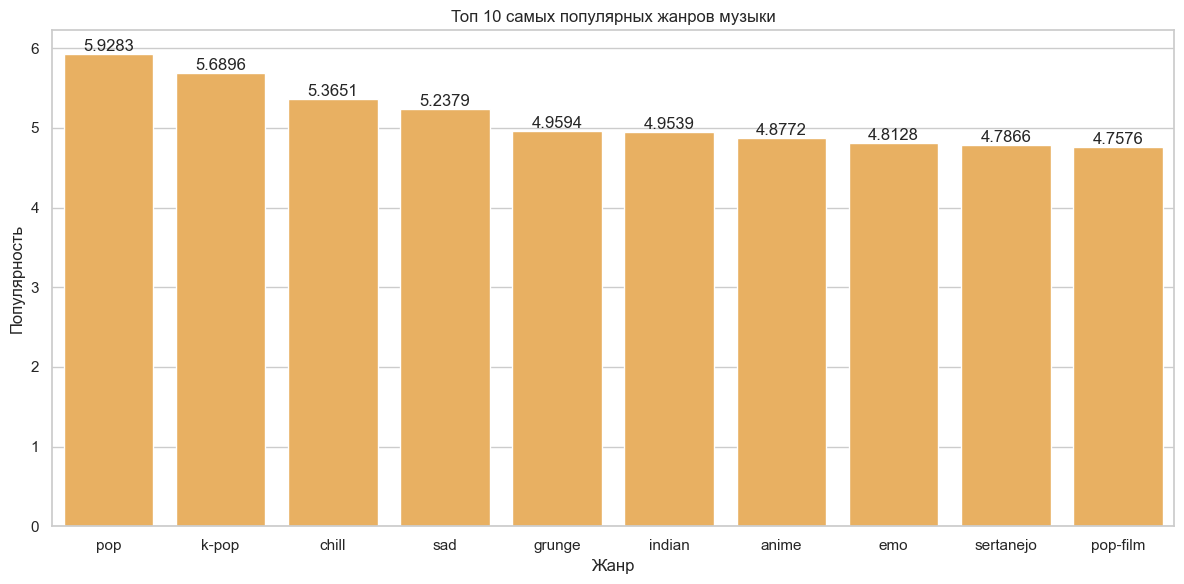

In [19]:
# Построение столбчатой диаграммы
plt.figure(figsize=(12, 6))
sns.set_style('whitegrid')

sns.barplot(x=x_top, y=y_top, color='#ffb34b', orient='v')

plt.title('Топ 10 самых популярных жанров музыки')
plt.xlabel('Жанр')
plt.ylabel('Популярность')

# Добавление текста над каждым столбцом
for i, v in enumerate(y_top):
    plt.text(i, v, f'{v:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

Для 10 наименее популярных жанров.

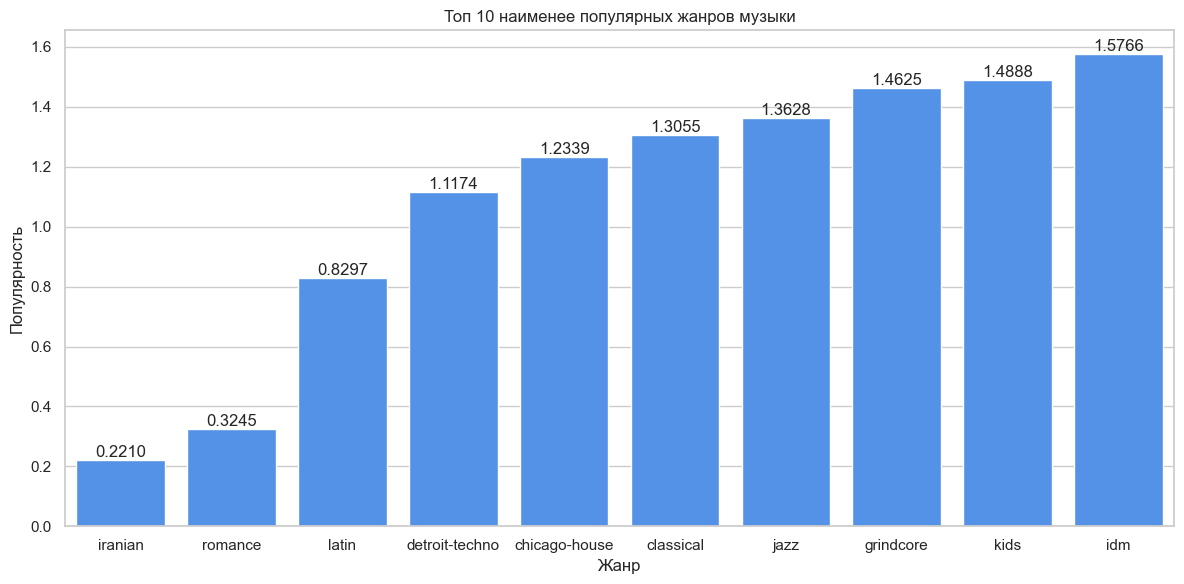

In [20]:
plt.figure(figsize=(12, 6))
sns.set_style('whitegrid')
sns.barplot(x=x_down, y=y_down, color='#3c8eff', orient='v')

plt.title('Топ 10 наименее популярных жанров музыки')
plt.xlabel('Жанр')
plt.ylabel('Популярность')

# Добавление текста над каждым столбцом
for i, v in enumerate(y_down):
    plt.text(i, v, f'{v:.4f}', ha='center', va='bottom')

# Отображение графика
plt.tight_layout()
plt.show()

**Вывод:** популярность песни зависит от её жанра.  

Наиболее популярны:
* `pop`
* `k-pop`
* `chill`

Наименее популярны:
* `iranian`
* `romance`
* `latin`

Это логично, так как всегда существовали жанры музыки, которые являются трендом в данный момент. Такие жанры, как иранская музыка, романс или латинская музыка, таковыми не являются.

---

#### 3. Популярность песен зависит от исполнителя.

Необходимо посчитать среднюю популярность для каждого исполнителя - то есть отношение его суммарной популярности и количества песен.

Создадим `DataFrame`, в котором будут колонки `artists` и `popularity`. В колонке `artists` будет только **один** артист, для каждого артиста популярность нужно считать отдельно.

*Заметка*: метод `explode` разделяет списки из столбца `artists` на отдельные строки.

Затем посчитаем количество песен у каждого артиста. Объединим эти два датасета. Добавим колонку `avg_popularity`, которая будет содержать среднюю популярность артиста.

Итоговый датасет отсортируем по убыванию средней популярности. Итого в датасете будут колонки `artists`, `popularity`, `count` и `avg_popularity`.

In [21]:
from copy import copy
# Копируем начальный датасет
temp_data = copy(data)
# Разделяем артистов
temp_data['artists'] = temp_data['artists'].str.split(';') 

data_exploded = temp_data.explode('artists')

# Находим сумму популярности для каждого артиста
art_pop = data_exploded.groupby('artists')['popularity'].sum().reset_index()
# Находим количество треков у каждого артиста.
art_count = data_exploded['artists'].value_counts().reset_index()
# Формируем итоговый датасет.
art_pop_count = pd.merge(art_pop, art_count, on='artists')
art_pop_count['avg_popularity'] = art_pop_count['popularity'] /  art_pop_count['count']
art_pop_count = art_pop_count.sort_values('avg_popularity', ascending=False).reset_index(drop=True)

**Топ 5 артистов с наибольшей средней популярностью**

In [22]:
top_5_artists = art_pop_count.head()
top_5_artists

,artists,popularity,count,avg_popularity
0,Quevedo,99,1,99.0
1,Bizarrap,99,1,99.0
2,Harry Styles,276,3,92.0
3,Luar La L,362,4,90.5
4,Beach Weather,90,1,90.0


Теперь отрисуем эти значения на графике. Это будет столбчатая диаграмма, по оси X будет название артиста (или группы), по оси Y - средняя популярность. 

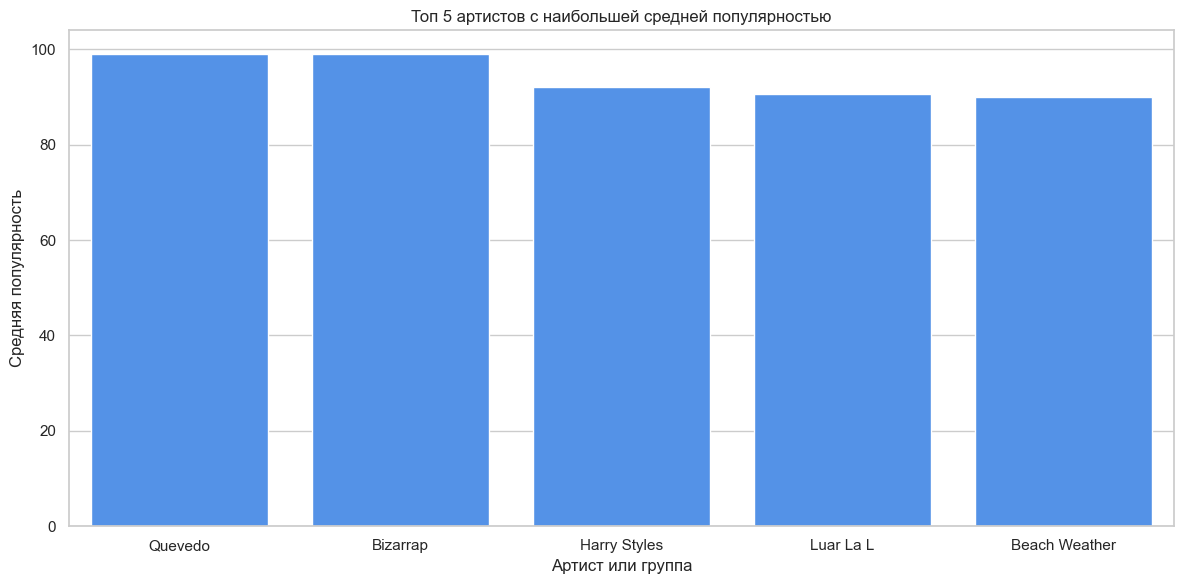

In [23]:
# Построение столбчатого графика, orient='v' означает, что столбцы ориентированы вертикально.
plt.figure(figsize=(12, 6))
sns.set_style('whitegrid')
sns.barplot(x=top_5_artists['artists'], y=top_5_artists['avg_popularity'], color='#3c8eff', orient='v')

plt.title('Топ 5 артистов с наибольшей средней популярностью')
plt.xlabel('Артист или группа')
plt.ylabel('Средняя популярность')


plt.tight_layout()
plt.show()

**Вывод:** популярность песни зависит от исполнителя.

Наиболее популярны:
* `Quevedo`
* `Bizarrap`
* `Harry Styles`

Некоторые исполнители имеют в датасете всего одну песню, но зато очень популярную.

---

#### 4. Если название песни совпадает с названием альбома, то песня будет популярнее. 

Построим гистограмму распределения популярности песен, у которых название совпадает с названием альбома.

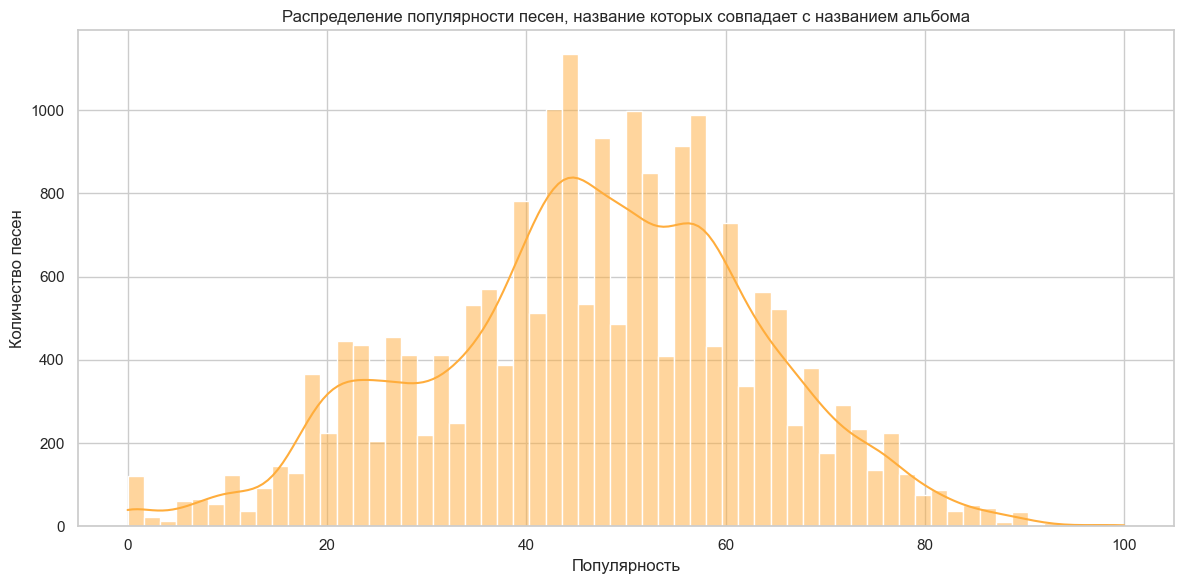

In [24]:
track_is_album = data[data['track_name']==data['album_name']]

# Построение гистограммы
plt.subplots(1, 1, figsize=(12, 6))
sns.histplot(data=track_is_album, x='popularity', kde=True, color='#ffad3c')

plt.title('Распределение популярности песен, название которых совпадает с названием альбома')
plt.xlabel('Популярность')
plt.ylabel('Количество песен')

plt.tight_layout()
plt.show()

Заметим очень интересную деталь, что эта распределение популярности таких песен очень похоже на нормальное распределение.

Сравним это распределение с распределением популярности всех песен.

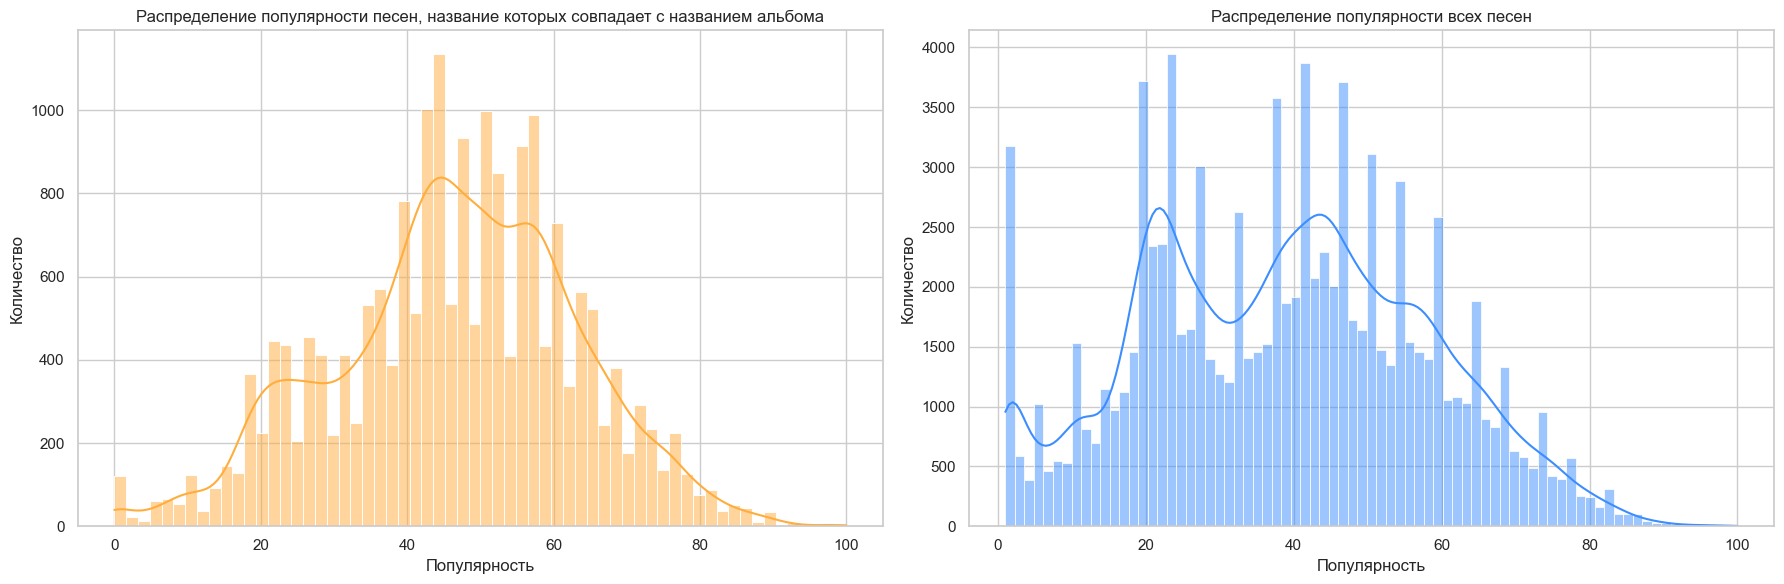

In [25]:
plt.figure(figsize=(18, 6))

# Построение 1 гистограммы, ax - её расположение.
sns.histplot(data=track_is_album, x='popularity', kde=True, color='#ffad3c', ax=plt.subplot(1, 2, 1))
plt.title('Распределение популярности песен, название которых совпадает с названием альбома')
plt.xlabel('Популярность')
plt.ylabel('Количество')

# Построение 2 гистограммы, ax - её расположение.
data_not_zero = data[data['popularity']>0]
sns.histplot(data=data_not_zero, x='popularity', kde=True, color='#3c8eff', ax=plt.subplot(1, 2, 2))
plt.title('Распределение популярности всех песен')
plt.xlabel('Популярность')
plt.ylabel('Количество')

plt.tight_layout()
plt.show()

Видим, что, хотя есть похожие черты, но распределения не являются одинаковыми.

**Вывод:** факт того, что название песни совпадает с названием альбома, не влияет на популярность песни.

#### Выводы

Из анализа датасета и корреляции можно сделать следующие выводы:
* `Популярность` песни слабо зависит от её технических характеристик (`темп`, `валентность` и т.д.).
* `Популярность` песни слабо зависит от её оценочных характеристик (`громкость`, `живость` и т.д.).
* Зато `популярность` песни зависит от её длины. Если песня длиннее **10 минут**, то она будет иметь среднюю или низкую популярность.
* `Популярность` песни зависит от того, какого она `жанра`.
* `Популярность` песни зависит от того, кто её `исполнитель`.
* Если `название песни` и `название альбома` совпадают, то это не влияет на `популярность` песни.


## 4. Создание признаков

### 4.1 Отношение популярности и длины трека.

В самом деле, анализ показывает, что популярность зависит от длины трека. Отразим эту зависимость в признаке `pop_of_duration`.

In [26]:
data['pop_of_duration'] = data['popularity'] / data['duration_min']
data.head()

,track_id,artists,album_name,track_name,popularity,duration_min,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,pop_of_duration
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,3.8,0,0.676,0.4610,1,...,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,19.210526
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,2.5,0,0.420,0.1660,1,...,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,22.000000
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,3.5,0,0.438,0.3590,0,...,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,16.285714
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,3.4,0,0.266,0.0596,0,...,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,20.882353
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,3.3,0,0.618,0.4430,2,...,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,24.848485


### 4.2 Зависимость популярности от жанра

Из анализа следует, что популярность песни зависит от её жанра. Покажем эту зависимость.

В ходе анализа был создан словарь `genres`, содержащий жанры и их популярность. Создадим `DataFrame`, содержащий жанр и его популярность. В нём будут колонки `track_genre` и `track_popularity`.

In [27]:
genres_pop = pd.DataFrame(list(genres.items()), columns=['track_genre', 'genre_popularity'])
genres_pop

,track_genre,genre_popularity
0,acoustic,4.2483
1,afrobeat,2.4399
2,alt-rock,3.3943
3,alternative,2.4337
4,ambient,4.4191
...,...,...
109,techno,3.9042
110,trance,3.7635
111,trip-hop,3.4460
112,turkish,4.0698


Теперь объединим этот датасет с основным.

In [28]:
data = pd.merge(data, genres_pop, on='track_genre')
data

,track_id,artists,album_name,track_name,popularity,duration_min,explicit,danceability,energy,key,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,pop_of_duration,genre_popularity
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,3.8,0,0.676,0.4610,1,...,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic,19.210526,4.2483
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,2.5,0,0.420,0.1660,1,...,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic,22.000000,4.2483
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,3.5,0,0.438,0.3590,0,...,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic,16.285714,4.2483
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,3.4,0,0.266,0.0596,0,...,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic,20.882353,4.2483
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,3.3,0,0.618,0.4430,2,...,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic,24.848485,4.2483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113994,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,6.4,0,0.172,0.2350,5,...,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music,3.281250,4.1873
113995,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,6.4,0,0.174,0.1170,0,...,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music,3.437500,4.1873
113996,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,4.5,0,0.629,0.3290,0,...,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music,4.888889,4.1873
113997,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,4.7,0,0.587,0.5060,7,...,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music,8.723404,4.1873


### 4.3 Зависимость популярности от исполнителя.

Из анализа выведено, что популярность песни зависит от исполнителя. Создадим соответствующий признак.

Из анализа есть датасет `art_pop_count`. Напомним, как он выглядит.

In [29]:
art_pop_count

,artists,popularity,count,avg_popularity
0,Quevedo,99,1,99.0
1,Bizarrap,99,1,99.0
2,Harry Styles,276,3,92.0
3,Luar La L,362,4,90.5
4,Beach Weather,90,1,90.0
...,...,...,...,...
29854,Julie Thompson,0,1,0.0
29855,Scabtik,0,2,0.0
29856,Trombone Shorty,0,2,0.0
29857,Junichi Hirokami,0,1,0.0


Колонки `popularity` и `count` нам не нужны. Мы их дропнем.

In [30]:
art_pop_count = art_pop_count.drop(columns=['popularity', 'count'])
art_pop_count

,artists,avg_popularity
0,Quevedo,99.0
1,Bizarrap,99.0
2,Harry Styles,92.0
3,Luar La L,90.5
4,Beach Weather,90.0
...,...,...
29854,Julie Thompson,0.0
29855,Scabtik,0.0
29856,Trombone Shorty,0.0
29857,Junichi Hirokami,0.0


Каким образом мы добавим признак? По следующим шагам:
1. Преобразуем `art_pop_count` в словарь, где `artists` - ключи, `avg_popularity` - значения.
2. Создадим функцию `calculate_average_popularity`, которая будет считать суммарную популярность артистов у трека.
3. На выход будем подавать отношение суммы популярностей артистов и количества артистов. Таким образом мы получим среднюю популярность артистов у трека.
4. Применим эту фукнцию для всех элементов столбца `artists` и создадим новый признак, который будет иметь название `avg_art_popularity`.

In [31]:
artist_popularity = dict(zip(art_pop_count['artists'], art_pop_count['avg_popularity']))

def calculate_average_popularity(track_artists: list) -> float:
    total_popularity = sum(artist_popularity.get(artist.strip(), 0) for artist in track_artists.split(';'))
    return total_popularity / len(track_artists.split(';'))

data['avg_art_popularity'] = data['artists'].apply(calculate_average_popularity)

### 4.4 Итоговый датасет со добавленными признаками.

Итого, после добавления признаков у нас получился датасет. Вот что значат новые признаки:
* `pop_of_duration` - зависимость популярности от длины трека. Содержит в себе числа с плавающей точкой.
* `genre_popularity` - популярность жанра трека. Содержит в себе числа с плавающей точкой.
* `avg_art_popularity` - средняя популярность артистов, исполняющих трек.

In [32]:
data

,track_id,artists,album_name,track_name,popularity,duration_min,explicit,danceability,energy,key,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,pop_of_duration,genre_popularity,avg_art_popularity
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,3.8,0,0.676,0.4610,1,...,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic,19.210526,4.2483,58.000000
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,2.5,0,0.420,0.1660,1,...,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic,22.000000,4.2483,42.923077
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,3.5,0,0.438,0.3590,0,...,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic,16.285714,4.2483,57.875000
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,3.4,0,0.266,0.0596,0,...,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic,20.882353,4.2483,51.090909
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,3.3,0,0.618,0.4430,2,...,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic,24.848485,4.2483,42.916667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113994,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,6.4,0,0.172,0.2350,5,...,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music,3.281250,4.1873,23.500000
113995,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,6.4,0,0.174,0.1170,0,...,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music,3.437500,4.1873,23.500000
113996,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,4.5,0,0.629,0.3290,0,...,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music,4.888889,4.1873,26.312500
113997,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,4.7,0,0.587,0.5060,7,...,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music,8.723404,4.1873,32.289474


## 5. Корреляция новых признаков с таргетом.

Теперь посмотрим, как новые признаки коррелируют с данными и между собой.  
В матрицу корреляций подадим колонки `popularity` (таргетная переменная), `pop_of_duration`, `genre_popularity`, `avg_art_popularity`.  
На основе матрицы корреляции построим `heatmap`.

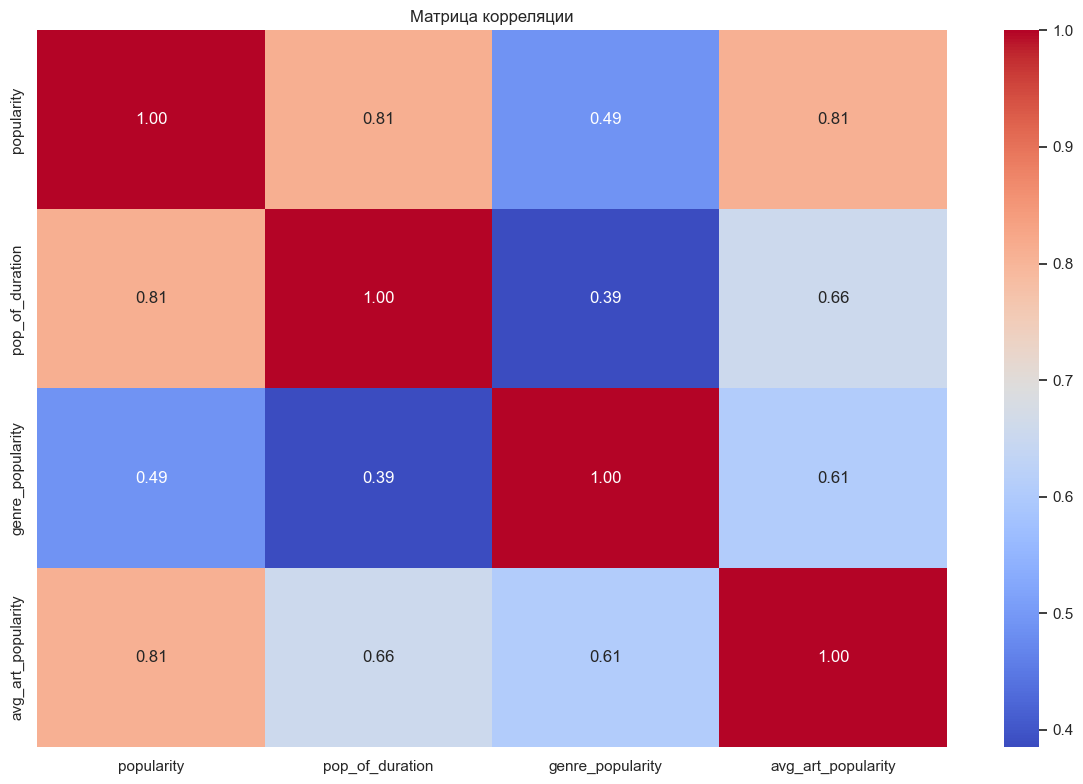

In [33]:
# Датафрейм с новыми строчками и таргетом.
corr_data = data.loc[:, ['popularity', 'pop_of_duration', 'genre_popularity', 'avg_art_popularity']]

# Построение тепловой карты корреляции
corr_data_1 = corr_data.corr()
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(data=corr_data_1, fmt='.2f', annot=True, cmap='coolwarm', ax=ax)

plt.title('Матрица корреляции')
plt.tight_layout()
plt.show()

Видим, что все признаки хорошо коррелируют между собой и с таргетной переменной.

Посмотрим корреляцию только с `popularity`.

In [34]:
corr_data_1['popularity']

popularity            1.000000
pop_of_duration       0.810505
genre_popularity      0.490964
avg_art_popularity    0.810028
Name: popularity, dtype: float64

**Выводы из корреляции:**  
1) Новые признаки хорошо коррелируют между собой. Это логично, они все в разной степени появились из признака `popularity`.
2) Признаки `pop_of_duration` и `avg_art_popularity` показывают хорошую корреляцию с таргетной переменной. У обоих значение примерно *81%*.
3) Признак `genre_popularity` показывает среднюю корреляцию с таргетной переменной (*49%*). 

## 6. Обучение на простой модели.

Необходимо построить простую модель для того, чтобы в дальнейшем сделать `Feature Importance`. 

### 6.1 Нормализация данных

Посмотрим, какие типы данных содержат колонки.

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113999 entries, 0 to 113998
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   track_id            113999 non-null  object 
 1   artists             113999 non-null  object 
 2   album_name          113999 non-null  object 
 3   track_name          113999 non-null  object 
 4   popularity          113999 non-null  int64  
 5   duration_min        113999 non-null  float64
 6   explicit            113999 non-null  int64  
 7   danceability        113999 non-null  float64
 8   energy              113999 non-null  float64
 9   key                 113999 non-null  int64  
 10  loudness            113999 non-null  float64
 11  mode                113999 non-null  int64  
 12  speechiness         113999 non-null  float64
 13  acousticness        113999 non-null  float64
 14  instrumentalness    113999 non-null  float64
 15  liveness            113999 non-nul

Видим, что колонки `track_id `, `artists`, `album_name`, `track_name` и `track_genre` содержат тип `object`. Для модели это недопустимо. Потому воспользуемся кодированием.

В качестве кодератора будем использовать `LabelEncoder`.  
Датасет придётся скопировать в новую переменную. Затем выберем колонки, которые нуждаются в кодировке (`object`).  
При кодировании мы проходимся по каждой кодируемой колонке, создаём кодератор и кодируем колонку. 

In [36]:
from sklearn.preprocessing import LabelEncoder
from copy import copy
# Копируем датасет
norm_data = copy(data)

# Достаём колонки, которые нуждаются в кодировке
categorical_cols = norm_data.select_dtypes(include=['object']).columns
label_encoders = {}

# Кодирование
for col in categorical_cols:
    le = LabelEncoder()
    norm_data[col] = le.fit_transform(norm_data[col])
    label_encoders[col] = le

### 6.2 Разделение данных на тестовый и обучающий датасеты

Для начала разделим итоговый датасет на два датасета: x и y. X содержит в себе все признаки, кроме таргетной переменной, y содержит только таргетную переменную. При помощи `train_test_split` мы разделим их на обучающую и тестовую выборки в соотношении 80% к 20% соответственно.

In [37]:
from sklearn.model_selection import train_test_split

x = norm_data.drop(columns=['popularity'])
y = norm_data['popularity']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### 6.3 Создание простой модели

Импортируем две библиотеки: `tensorflow` и `keras`, обе используются в ML.

In [38]:
import tensorflow as tf
from tensorflow import keras

Создадим простую модель полносвязной нейронной сети.  
Для начала мы скейлим данные при помощи `StandartScaler`.  


Затем мы строим саму модель. Состоять она будет из *3* слоёв. Вот какие в ней будут слои:
* **Входной слой.** В нём *64* нейрона, функция активации - `relu`, в качестве входного размера даём количество признаков.
* **Скрытый слой.** В нём *64* нейрона, функция активации - `relu`.
* **Выходной слой.** В нём всего один нейрон и  функции активации нет. Всё потому, что модель должна выдавать одно предсказанное число, потому всего один нейрон и потому функция активации не применяется.

Теперь мы компилируем модель. В качестве оптимизатора используем `Adam`, в качестве метрики - `Mean Squared Error (MSE)` (средняя квадратичная ошибка).

In [42]:
from sklearn.preprocessing import StandardScaler

# Скейлинг данных
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Построение модели
model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(1)
])

# Компиляция модели
model.compile(optimizer='adam', loss='mean_squared_error')

### 6.4 Обучение модели

Теперь модель необходимо обучить и найти `loss`.  

Гиперпараметры обучения:
* **epochs = 10** - это количество эпох, в течение которых обучается модель.
* **batch_size = 32** - это размер пакета (модель для обучения получает данные пакетами).
* **validation_split=0.2** - это выделение данных на валидацию. То есть тут мы выделяем из обучающих данных 20% на валидацию. На валидации также считается метрика.

In [43]:
# Обучение модели
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Нахождение лосса
loss = model.evaluate(x_test, y_test)
print(f'Test loss: {loss}')

Epoch 1/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 3s 869us/step - loss: 296.8912 - val_loss: 28.2283
Epoch 2/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 2s 855us/step - loss: 20.6844 - val_loss: 7.3865
Epoch 3/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 2s 772us/step - loss: 7.8515 - val_loss: 4.2987
Epoch 4/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 2s 780us/step - loss: 4.2011 - val_loss: 2.8639
Epoch 5/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 2s 787us/step - loss: 3.3081 - val_loss: 1.8915
Epoch 6/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 2s 812us/step - loss: 2.1125 - val_loss: 1.7545
Epoch 7/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 2s 780us/step - loss: 1.9282 - val_loss: 7.3633
Epoch 8/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 2s 780us/step - loss: 3.3026 - val_loss: 0.8401
Epoch 9/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 2s 776us/step - loss: 2.2060 - val_loss: 1.1019
Epoch 10/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 2s 805us/step - loss: 3.1917 - val_loss: 0.7514
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 519us/step - loss: 0.7801
Test loss: 0.7327330708503723


Изобразим график изменения loss на валидационном и тренировочном датасете.

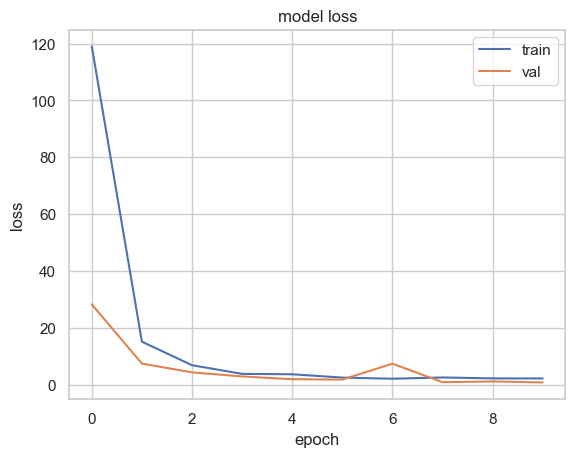

In [44]:
# Изменение лосса на тренировочном датасете
plt.plot(history.history['loss'])
# Изменение лосса на валидационном датасете
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

Видим, что `loss` меняется весьма резко на первых эпохах, а потом изменение более гладкое.

### 6.5 Прогнозирование от простой модели.

Попробуем получить прогноз от простой модели и получить метрики:
* **MAE (mean absolute error)** - средняя абсолютная ошибка. Получается при помощи среднего арифметического разностей предсказания и факта.
* **MSE (mean squared error)** - средняя квадратичная ошибка. Получается при помощи среднего арифметического квадратов разностей предсказания и факта.
* **RMSE (root mean squared error)** - корень из средней квадратичной ошибки. Получается корнем из `MSE`.

In [45]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# Прогнозирование на тестовой выборке
y_pred = model.predict(x_test)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 532us/step
MAE: 0.5009361900153912
MSE: 0.7327327557649107
RMSE: 0.8559981050007709


## 7. Feature Importance

### 7.1 Важность признаков

Теперь можно проводить `Feature Importance` (важность признаков), для выявления признаков, которые больше всего влияют на лосс.

Делать мы этом будем при помощи `Permutation Importance` (важность перестановок). Общая идея состоит в том, чтобы наблюдать, как случайное перемешивание (перестановка) каждой функции влияет на результативность модели.

Параметры для `permutation importance`:
* **estimator = model** - обученная модель, на которой проверяется важность.
* **x = x_test** - данные, на которых будет считаться важность.
* **y = y_test** - таргетная переменная.
* **n_repeats = 10** - количество перестановок для каждого признака.
* **random_state = 42** - псевдослучайное число для управления перестановками каждой функции.
* **scoring = "neg_mean_absolute_error"** - это метрика, по которой определяем важность. Используется уменьшение средней абсолютной ошибки в нашем случае.

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 765us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 604us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 557us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 652us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 528us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 747us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 590us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 635us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 757us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 573us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 719us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 589us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 629us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 606us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 662us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 573us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 657us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 528us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 533us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 533us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 741us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 601us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 545us/step
713/713 ━━━

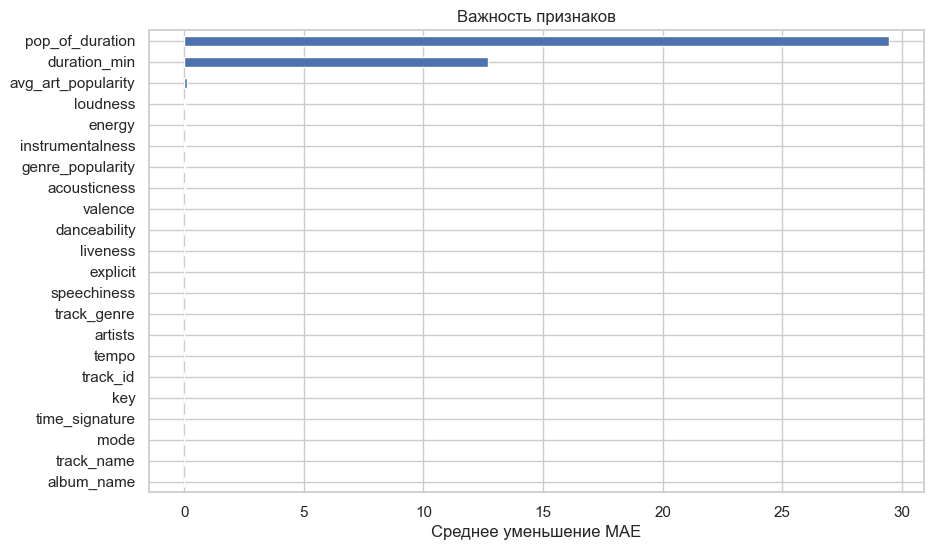

In [214]:
from sklearn.inspection import permutation_importance

#* permutation importance
result = permutation_importance(model,
                                x_test, 
                                y_test, 
                                n_repeats=10, 
                                random_state=42, 
                                scoring='neg_mean_absolute_error')
importances = pd.Series(result.importances_mean, index=x.columns)

# Визуализация
importances.sort_values().plot(kind='barh', figsize=(10,6))
plt.title('Важность признаков')
plt.xlabel('Среднее уменьшение MAE')
plt.show()

Видим, что очень значительный вклад вносят два признака - `pop_of_duration` (зависимость популярности от длины трека) и `duration_min` (длина трека). Остальные признаки вносят почти несущественный вклад. Чтобы понять это лучше, отобразим график без колонок `pop_of_duration` и `duration_min`.

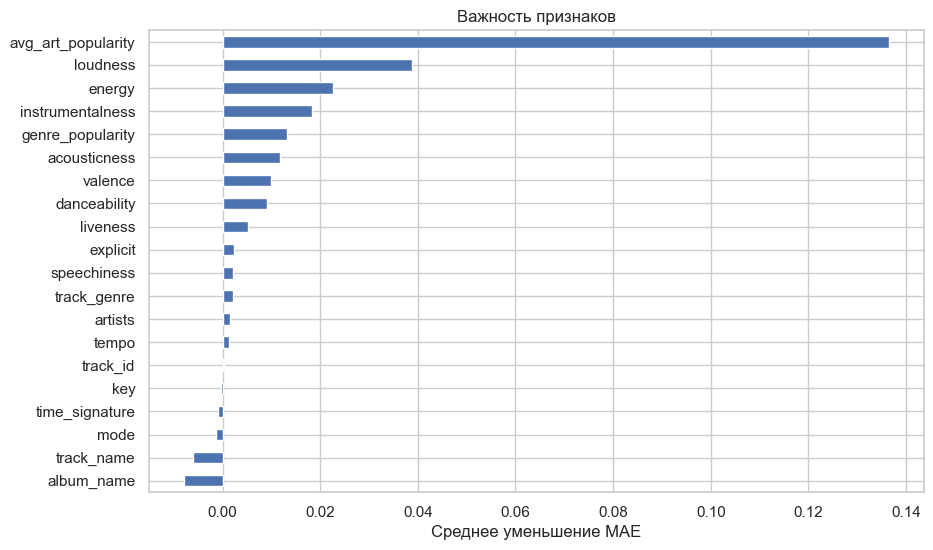

In [222]:
# Убираем признаки из колонок
indexes = list(x.columns)
indexes.remove('pop_of_duration')
indexes.remove('duration_min')

# Убираем их метрики из итоговой важности
res_imp = list(result.importances_mean)
res_imp.pop(4)
res_imp.pop(18)


importances_1 = pd.Series(res_imp, index=indexes)

# Визуализация
importances_1.sort_values().plot(kind='barh', figsize=(10,6))
plt.title('Важность признаков')
plt.xlabel('Среднее уменьшение MAE')
plt.show()

### 7.2 Выводы

1) `pop_of_duration` - зависимость популярности от длины трека. Признак **очень** сильно влияет на уменьшение MAE.
2) `duration_min` - длина трека в минутах. Признак также сильно влияет на уменьшение MAE.
3) `avg_art_popularity` - средняя популярность артистов. Признак влияет гораздо меньше, чем предыдущие, но всё ещё оказывает влияние.
4) `loudness` и `energy` - громкость и энергия соответственно. Признаки слабее влияют на уменьшение MAE.
5) `genre_popularity` - популярность жанра. Это кастомный признак. Видно, что он мало влияет на уменьшение MAE.
6) `album_name`, `track_name`, `mode`, `time_signature` - название альбома, название трека, режим записи и размер такта соответственно. Влияют на уменьшение MAE **отрицательно**, то есть, увеличивают её.

## 8. Возвращение к анализу. Построение гипотез и создание признаков. 

Всё же кастомные признаки `pop_of_duration`, `avg_art_popularity` и `genre_popularity` являются производными от `popularity`, потому не могут использоваться для регрессии. Необходимо создать новые гипотезы и новые признаки, а эти убрать.

In [39]:
data = data.drop(columns=['pop_of_duration', 'avg_art_popularity', 'genre_popularity'])

### 8.1 Зависимость от длительности трека

Из прошлого анализа стало ясно, что если `duration_min` имеет значение меньше, чем **10**, то с более высокой долей вероятности песня будет популярна. Создадим признак `dur_10_limit`, который будет иметь значение **1**, если песня длится менее 10 минут, и значение **0**, если песня длится более 10 минут.

In [40]:
data['dur_10_limit'] = data['duration_min'] < 10 
data['dur_10_limit'] = data['dur_10_limit'].astype('int64')

### 8.2 Чем энергичнее песня, тем она более популярна

Энергичность песни (`energy`) может влиять на популярность: чем песня энергичнее, тем она более популярна.  
Напомню, что `energy` принимает значения от 0 до 1.

Построим график регрессии популярности от энергичности. 

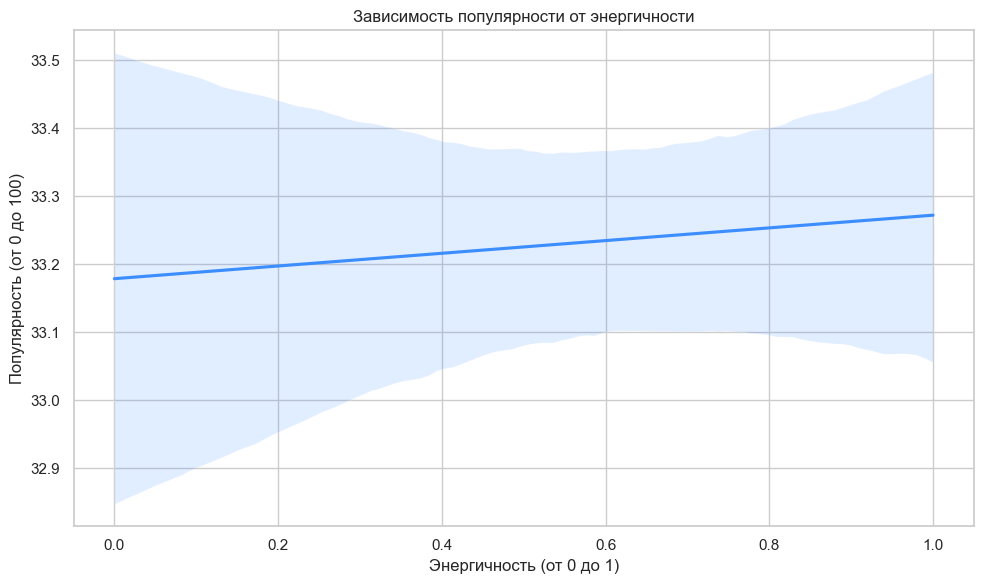

In [48]:
plt.figure(figsize=(10, 6))

# Добавляем линейные регрессию для лучшего представления зависимости
sns.regplot(x='energy', y='popularity', data=data, scatter=False, color="#3c8eff")

plt.title('Зависимость популярности от энергичности')
plt.xlabel('Энергичность (от 0 до 1)')
plt.ylabel('Популярность (от 0 до 100)')

# Отображаем график
plt.tight_layout()
plt.show()

**Вывод:** популярность песни не зависит от её энергичности. Потому признак делать не будем.

### 8.3 Танцевальность песни влияет на её популярность.

Возможно, на популярность песни влияет показатель её танцевальности (`danceability`). Проверим это, построив график зависимости `popularity` от `danceability`.

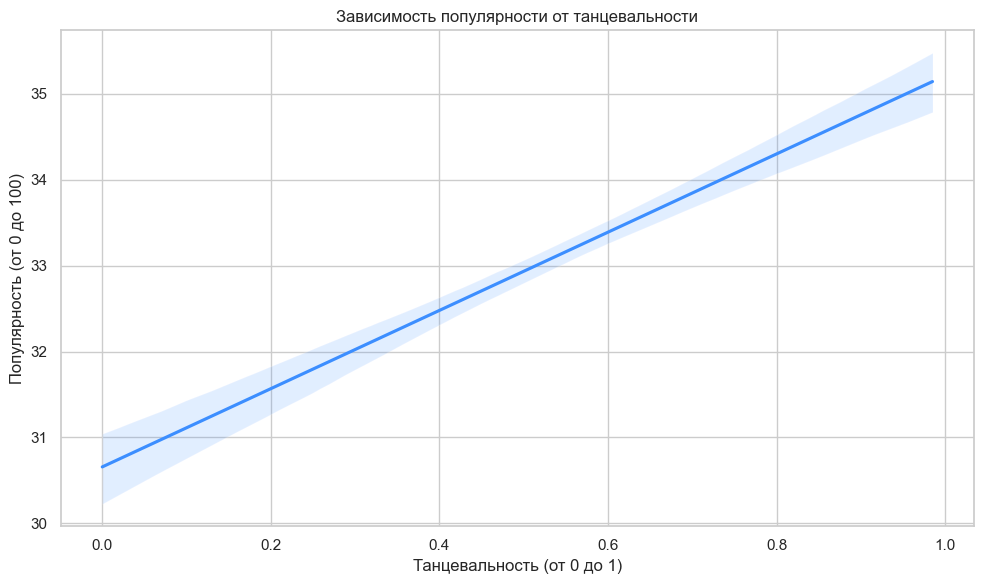

In [102]:
plt.figure(figsize=(10, 6))

# Добавляем линейные регрессию для лучшего представления зависимости
sns.regplot(x='danceability', y='popularity', data=data, scatter=False, color="#3c8eff")

plt.title('Зависимость популярности от танцевальности')
plt.xlabel('Танцевальность (от 0 до 1)')
plt.ylabel('Популярность (от 0 до 100)')

# Отображаем график
plt.tight_layout()
plt.show()

**Вывод**: немного, но популярность зависит от танцевальности музыки. Значит, стоит  сделать признак.

Создадим признак `high_danceability`. Он будет равен 1, если `danceability` >= 0.5, и равен 0, если `danceability` < 0.5.

In [41]:
data['high_danceability'] = data['danceability'] >= 0.5 
data['high_danceability'] = data['high_danceability'].astype('int64')

### 8.4 Валентность песни влияет на популярность.

Валентность песни (привлекательность звуков, `valence`) может также влиять на популярность в прямой пропорциональности. Проверим это, построив график линейной регрессии. 

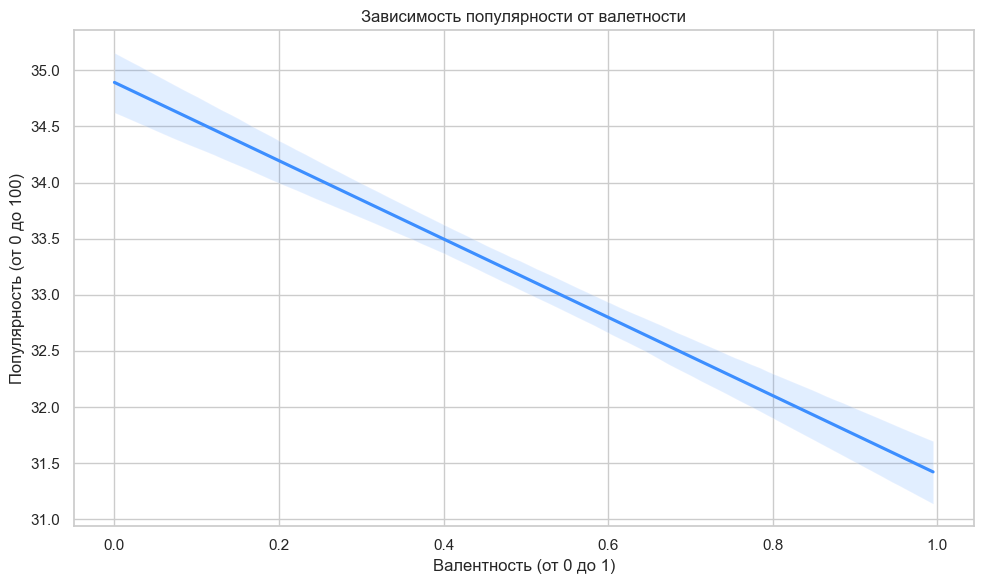

In [ ]:
plt.figure(figsize=(10, 6))

# Добавляем линейные регрессию для лучшего представления зависимости
sns.regplot(x='valence', y='popularity', data=data, scatter=False, color="#3c8eff")

plt.title('Зависимость популярности от валетности')
plt.xlabel('Валентность (от 0 до 1)')
plt.ylabel('Популярность (от 0 до 100)')

# Отображаем график
plt.tight_layout()
plt.show()

**Вывод:** видим обратную пропорциональность между `valence` и `popularity`. То есть, наоборот, чем меньше валетность, тем больше вероятность, что популярность больше.

В таком случае создадим признак `low_valence`, который принимает значение **1**, когда `valence` < 0.5, и значение **0**, когда `valence` >= 0.5.

In [42]:
data['low_valence'] = data['valence'] < 0.5 
data['low_valence'] = data['low_valence'].astype('int64')

### 8.5 Инструментальность песни влияет на её популярность.

Возможно, значение `instrumentalness` (качестве инструментов) влияет на популярность. Также построим график линейной регрессии для проверки этого.

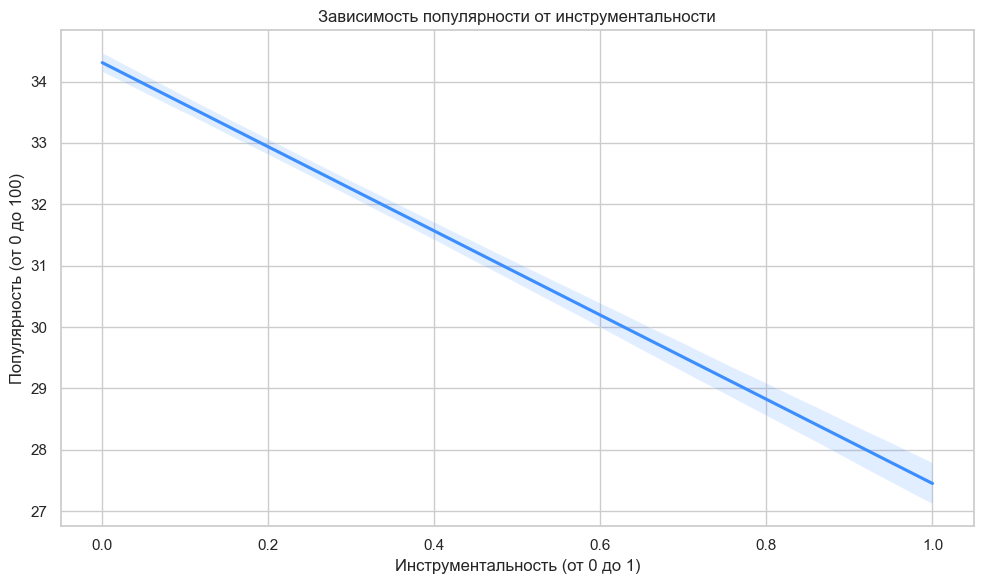

In [110]:
plt.figure(figsize=(10, 6))

# Добавляем линейные регрессию для лучшего представления зависимости
sns.regplot(x='instrumentalness', y='popularity', data=data, scatter=False, color="#3c8eff")

plt.title('Зависимость популярности от инструментальности')
plt.xlabel('Инструментальность (от 0 до 1)')
plt.ylabel('Популярность (от 0 до 100)')

# Отображаем график
plt.tight_layout()
plt.show()

**Вывод:** зависимость `popularity` от `instrumentalness` обратно пропорциональная. То есть, чем ниже качество инструментов, тем выше популярность. Это не кажется мне логичным, но пусть оно так.

Потому создадим признак `low_instrum`. Он принимает значение **1**, когда `instrumentalness` < 0.5, и значение **0**, когда `instrumentalness` >= 0.5.

In [43]:
data['low_instrum'] = data['instrumentalness'] < 0.5 
data['low_instrum'] = data['low_instrum'].astype('int64')

### 8.6 Влияние громкости на популярность

Громкая музыка подходит для вечеринок. Потому можно предположить, что на `popularity` влияет `loudness`. Проверим при помощи графика линейной регрессии.

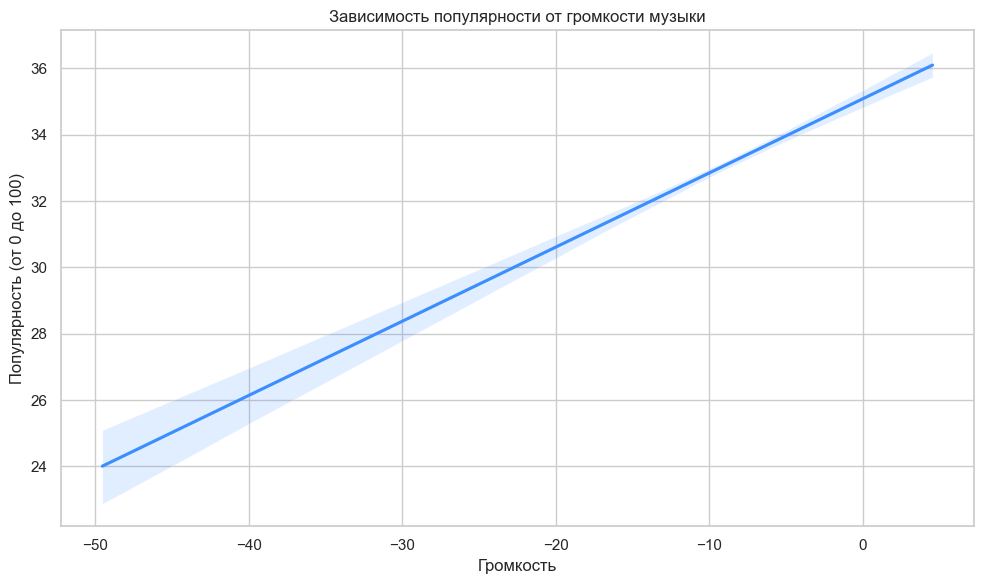

In [114]:
plt.figure(figsize=(10, 6))

# Добавляем линейные регрессию для лучшего представления зависимости
sns.regplot(x='loudness', y='popularity', data=data, scatter=False, color="#3c8eff")

plt.title('Зависимость популярности от громкости музыки')
plt.xlabel('Громкость')
plt.ylabel('Популярность (от 0 до 100)')

# Отображаем график
plt.tight_layout()
plt.show()

**Вывод:** громкость напрямую влияет на популярность. Потому можно создавать признак. Узнаем среднюю громкость среди всех песен.

In [44]:
avg_loudness = sum(data['loudness']) / len(data)
avg_loudness

-8.25894983289327

Создадим признак `high_loudness`, который примет значение **1**, если `loudness` >= `avg_loudness`, и значение **0**, если это не так.

In [45]:
data['high_loudness'] = data['loudness'] >= avg_loudness 
data['high_loudness'] = data['high_loudness'].astype('int64')

### 8.7 Влияние темпа песни на популярность.

Возможно, чем больше `tempo` (удары в минуту), тем популярнее песня. Проверим при помощи линейной регрессии.

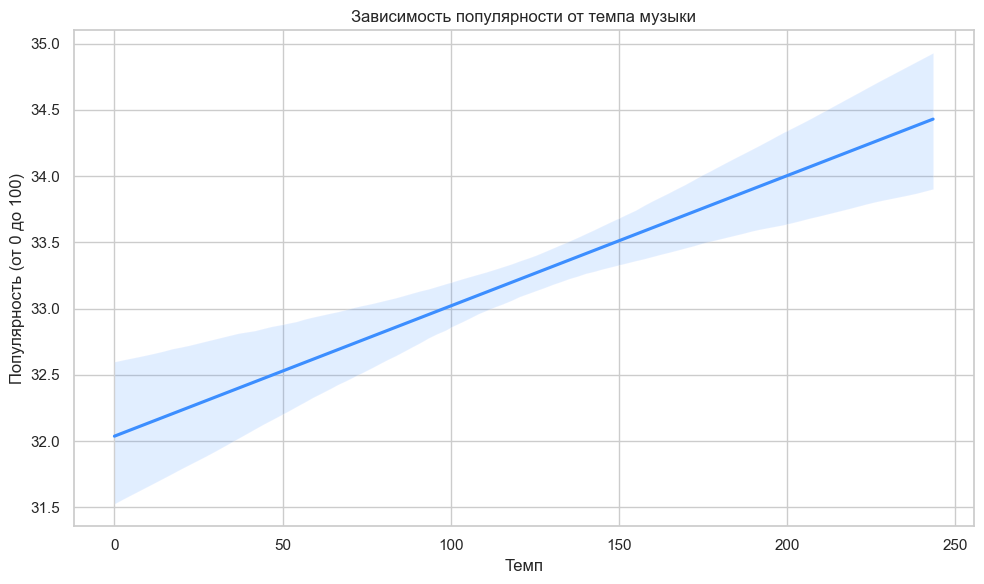

In [120]:
plt.figure(figsize=(10, 6))

# Добавляем линейные регрессию для лучшего представления зависимости
sns.regplot(x='tempo', y='popularity', data=data, scatter=False, color="#3c8eff")

plt.title('Зависимость популярности от темпа музыки')
plt.xlabel('Темп')
plt.ylabel('Популярность (от 0 до 100)')

# Отображаем график
plt.tight_layout()
plt.show()

**Вывод:** популярность песни зависит от её темпа прямо пропорционально. 

Для создания признака узнаем средний темп песни.

In [46]:
avg_tempo = sum(data['tempo']) / len(data)
avg_tempo

122.14769480434039

Создадим признак `high_tempo`. Он примет значение **1**, если `tempo` >= `avg_tempo`, и значение **0**, если наоборот.

In [47]:
data['high_tempo'] = data['tempo'] >= avg_tempo
data['high_tempo'] = data['high_tempo'].astype('int64')

### 8.8 Выводы

**Выводы из проверки гипотез:**
* `popularity` зависит от длины трека (`duration_min`); 
* `popularity` не зависит от энергичности песни (`energy`);
* `popularity` прямо зависит от танцевальности (`danceability`);
* `popularity` обратно зависит от валентности (`valence`);
* `popilarity` обратно зависит от инструментальности (`instrumentalness`);
* `popularity` прямо зависит от громкости (`loudness`);
* `popularity` прямо зависит от темпа песни (`tempo`);


**Созданные признаки (они все бинарны и само-репрезентативны):**
* `dur_10_limit`
* `high_danceability`
* `low_valence`
* `low_instrum`
* `high_loudness`
* `high_tempo`

## 9. Нормализация, обучение и Permutation Importance.

### 9.1 Операции с датасетом с новыми признаками.

Теперь с новыми признаками сделаем нормализацию, обучение модели и `Permutation Importance`. Комментариев почти не будет, так как это всё делалось на предыдущих шагах.

Начнём с **нормализации**.

In [48]:
# Копируем датасет
norm_data = copy(data)

# Достаём колонки, которые нуждаются в кодировке
categorical_cols = norm_data.select_dtypes(include=['object']).columns
label_encoders = {}

# Кодирование
for col in categorical_cols:
    le = LabelEncoder()
    norm_data[col] = le.fit_transform(norm_data[col])
    label_encoders[col] = le

Теперь разделим датасет на **обучающую** и **тестовую** выборки:

In [49]:
from sklearn.model_selection import train_test_split

x = norm_data.drop(columns=['popularity'])
y = norm_data['popularity']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

**Модель** остаётся точно такой же.

In [151]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Построение модели
model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(1)
])

# Компиляция модели
model.compile(optimizer='adam', loss='mean_squared_error')

**Обучение модели** (в этот раз побольше эпох):

In [152]:
# Обучение модели
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

# Нахождение лосса
loss = model.evaluate(x_test, y_test)
print(f'Test loss: {loss}')

713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step - loss: 423.0089
Test loss: 415.5214538574219


Сразу заметим, что *loss* стал заметно выше, чем с прошлыми признаками. Построим график уменьшения *loss* с эпохами.

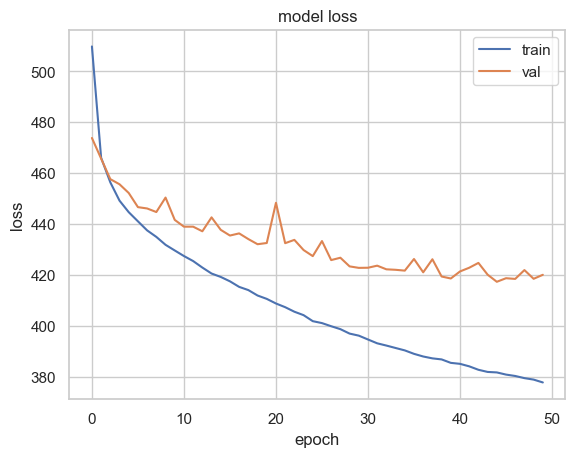

In [153]:
# Изменение лосса на тренировочном датасете
plt.plot(history.history['loss'])
# Изменение лосса на валидационном датасете
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

Посчитаем метрики. Они остались ровно такими же, как и раньше.

In [154]:
# Прогнозирование на тестовой выборке
y_pred = model.predict(x_test)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step
MAE: 16.291079206830055
MSE: 415.52156185577184
RMSE: 20.3843460001976


Теперь проведём `Permutation Importance`.

713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
713/713 ━━━

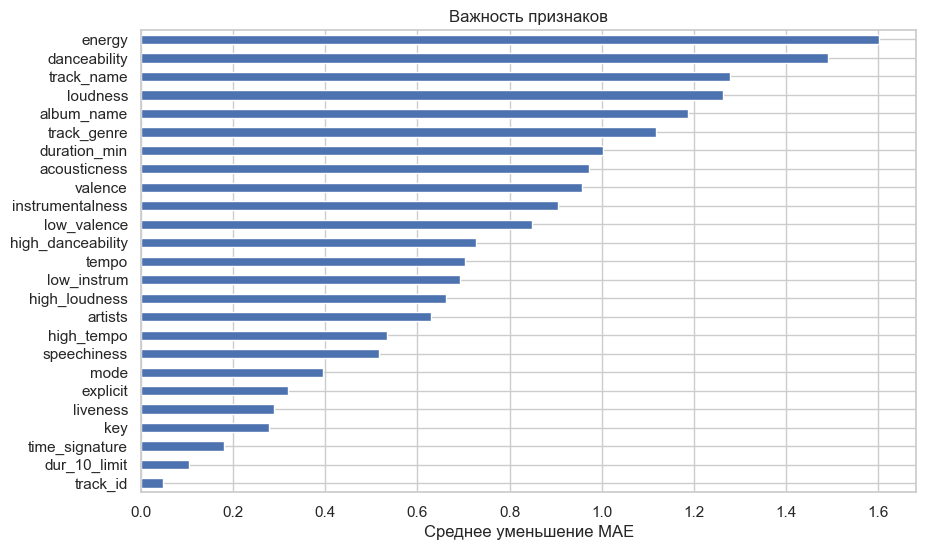

In [139]:
from sklearn.inspection import permutation_importance

result = permutation_importance(model,
                                x_test, 
                                y_test, 
                                n_repeats=10, 
                                random_state=42, 
                                scoring='neg_mean_absolute_error')
importances = pd.Series(result.importances_mean, index=x.columns)

# Визуализация
importances.sort_values().plot(kind='barh', figsize=(10,6))
plt.title('Важность признаков')
plt.xlabel('Среднее уменьшение MAE')
plt.show()

**Вывод:** 
1. Видим, что весьма сильно влияет на уменьшение MAE признак `energy` (внезапно).
2. Кастомные признаки (кроме `dur_10_limit`) влияют средне. 
3. Самые бесполезные признаки - `track_id`, `dur_10_limit`, `time_signature`, `key` и `liveness`.

Потому избавимся от признаков, которые ниже **0.4**.

In [51]:
norm_data_result = norm_data.drop(columns=['track_id', 'dur_10_limit', 'time_signature', 'key', 'liveness', 'explicit', 'mode'])

Посмотрим на корреляцию новых колонок с таргетом:

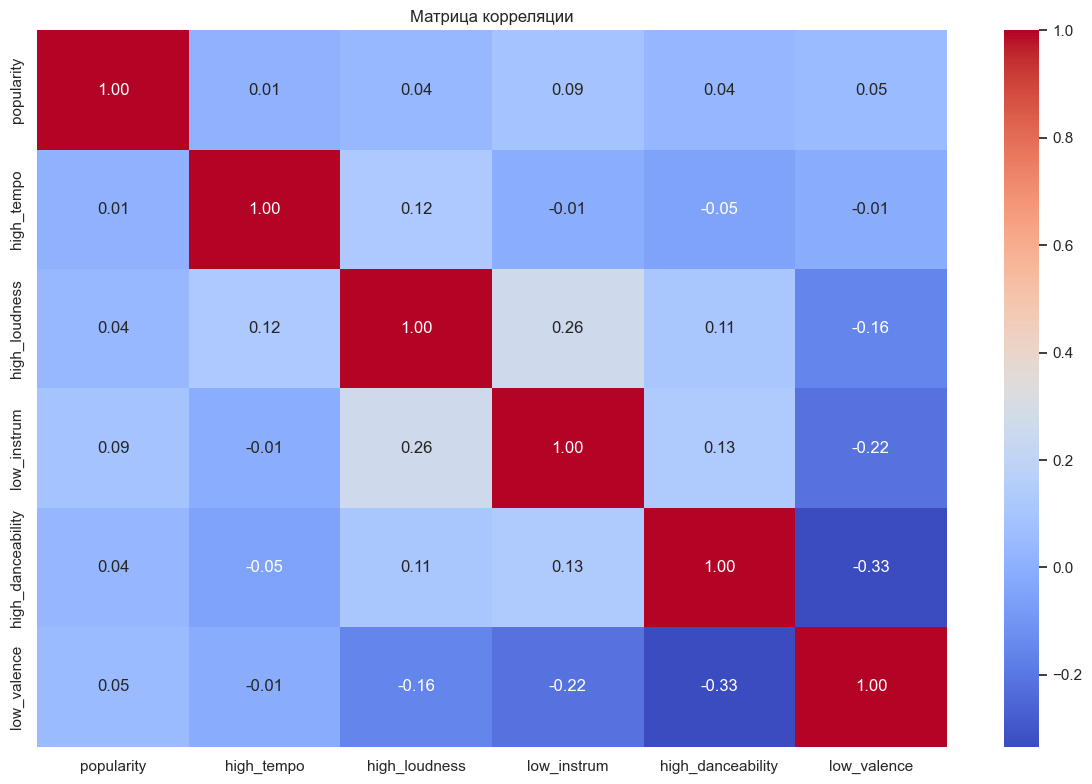

In [66]:
# Датафрейм с новыми строчками и таргетом.
corr_data = data.loc[:, ['popularity', 'high_tempo', 'high_loudness', 'low_instrum', 'high_danceability', 'low_valence']]

# Построение тепловой карты корреляции
corr_data_1 = corr_data.corr()
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(data=corr_data_1, fmt='.2f', annot=True, cmap='coolwarm', ax=ax)

plt.title('Матрица корреляции')
plt.tight_layout()
plt.show()

### 9.2 Вывод

В итоге можно сделать вывод, что новые признаки всё еще слабо коррелируют с таргетной переменной. Строго говоря, все признаки слабо с ней коррелируют. То есть репрезентативных признаков создать не получилось. Будем работать с тем, что имеем.

**Итого датасет будет выглядеть так:**

In [67]:
norm_data_result

,artists,album_name,track_name,popularity,duration_min,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo,track_genre,high_danceability,low_instrum,high_loudness,high_tempo,low_valence
0,10357,8100,11741,73,3.8,0.676,0.4610,-6.746,0.1430,0.0322,0.000001,0.7150,87.917,0,1,1,1,0,0
1,3287,14796,22528,55,2.5,0.420,0.1660,-17.235,0.0763,0.9240,0.000006,0.2670,77.489,0,0,1,0,0,1
2,12397,39162,60774,57,3.5,0.438,0.3590,-9.734,0.0557,0.2100,0.000000,0.1200,76.332,0,0,1,0,0,1
3,14839,8580,9580,71,3.4,0.266,0.0596,-18.515,0.0363,0.9050,0.000071,0.1430,181.740,0,0,1,0,1,1
4,5255,16899,25689,82,3.3,0.618,0.4430,-9.681,0.0526,0.4690,0.000000,0.1670,119.949,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113994,22486,66,53329,21,6.4,0.172,0.2350,-16.393,0.0422,0.6400,0.928000,0.0339,125.995,113,0,0,0,1,1
113995,22486,66,65090,22,6.4,0.174,0.1170,-18.318,0.0401,0.9940,0.976000,0.0350,85.239,113,0,0,0,0,1
113996,4952,5028,38207,22,4.5,0.629,0.3290,-10.895,0.0420,0.8670,0.000000,0.7430,132.378,113,1,1,0,1,0
113997,18534,7238,21507,41,4.7,0.587,0.5060,-10.889,0.0297,0.3810,0.000000,0.4130,135.960,113,1,1,0,1,1


## 10. Построение моделей машинного обучения.

Нам необходимо построить модели машинного обучения для каждого из семейств: `линейные`, `деревья`, `модификации градиентного бустинга`, `нейронные сети`.

Разделим датасет на тренировочный и тестовый выборки:

In [52]:
x = norm_data_result.drop(['popularity'], axis=1)
y = norm_data_result['popularity']

x_train, x_test, y_train, y_test = train_test_split(x, y, shuffle=True)

### 10.1 Построение модели дерева (Random Forest Regressor).

Построим модель регрессии случайного леса - `Random Forest Regressor`.

Этот метод основан на создании множества деревьев решений и их комбинировании. То есть создаётся множество отдельных деревьев решений. Каждое дерево учитывает только часть признаков и подвыборки данных. При прогнозе используется среднее значение предсказаний всех деревьев.

Преимущества:
* Уменьшает переобучение за счёт случайной выборки.
* Может обрабатывать нелинейные зависимости между признаками и таргетной переменной.

Значения параметров:
* `max_depth` - максимальная глубина дерева решений. Ограничивает количество уровней в дереве, чтобы предотвратить переобучение.
* `n_estimators` - количество деревьев в случайном лесу.
* `min_samples_split` - минимальное количество образцов для разделения узла. Узел будет разделен только если в нем больше или равно 5 образцов. Помогает избежать переобучения.
* `min_samples_leaf` - минимальное количество образцов в листовых узлах. Листовой узел будет создан только если в нем больше или равно 2 образцов. Это помогает предотвратить слишком мелкие деревья.
* `random_state` - начальное состояние для генератора случайных чисел.

In [68]:
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor(
    max_depth=10,
    n_estimators=1000,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=0
)
random_forest.fit(x_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                      n_estimators=1000, random_state=0)

Узнаем метрики для данной модели. Будем использоввать метрики `MAE`, `MSE`, `RMSE`, `R2`.

In [69]:
from sklearn.metrics import r2_score

# Прогнозирование на тестовой выборке
y_pred_rf = random_forest.predict(x_test)

# Вычисление метрик
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mse_rf ** 0.5
r2_rf = r2_score(y_test, y_pred_rf)

print('Метрики для случайного леса регрессии:')
print(f'MAE: {mae_rf}')
print(f'MSE: {mse_rf}')
print(f'RMSE: {rmse_rf}')
print(f'R2: {r2_rf}')

Метрики для случайного леса регрессии:
MAE: 15.392926831152266
MSE: 370.6299899358889
RMSE: 19.25175290553795
R2: 0.24835145132717396


### 10.2 Построение модели градиентного бустинга (Gradient Boosting Regressor).

Построим модель регрессии градиентного бустинга - `Gradient Boosting Regressor`.

Это алгоритм, который комбинирует простые модели, создавая сложные и более точные. Как он работает? На основе ошибок прошлых моделей он последовательно добавляет новые модели. 

Начинается всё с базовой модели. Затем алгоритм вычисляет градиент ошибки этой модели, создаёт новую модель, которая минизирует этот градиент ошибки. Процесс повторяется несколько раз.

Преимущества:
* Высокая точность.
* Может работать с необработанными данными.

Параметры:
* `learning_rate` - скорость обучения для каждого дерева решений.
* `n_estimators` - количество деревьев, которые будут использоваться для прогнозирования.
* `max_depth` - максимальная глубина дерева решений.
* `min_samples_split` - минимальное количество образцов для разделения дерева.
* `min_samples_leaf` - минимальное количество образцов в листовых узлах дерева.
* `alpha` - параметр регуляризации для предотвращения переобучения.

In [53]:
from sklearn.ensemble import GradientBoostingRegressor

gradient_boosting = GradientBoostingRegressor(
                    learning_rate=0.01,
                    n_estimators=1000,
                    max_depth=10, 
                    min_samples_split=5,
                    min_samples_leaf=2,
                    alpha=0.1
                    )
gradient_boosting.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.1, learning_rate=0.01, max_depth=10,
                          min_samples_leaf=2, min_samples_split=5,
                          n_estimators=1000)

Узнаем метрики:

In [54]:
# Прогнозирование на тестовой выборке
y_pred_gb = gradient_boosting.predict(x_test)

# Вычисление метрик
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = mse_gb ** 0.5
r2_gb = r2_score(y_test, y_pred_gb)

print('Метрики для регрессии градиентного бустинга:')
print(f'MAE: {mae_gb}')
print(f'MSE: {mse_gb}')
print(f'RMSE: {rmse_gb}')
print(f'R2: {r2_gb}')

Метрики для регрессии градиентного бустинга:
MAE: 10.418085826969408
MSE: 198.6361513257299
RMSE: 14.093833805098239
R2: 0.5983714610997592


### 10.3 Построение модели линейной регрессии (Linear Regression).

Построим модель линейной регрессии (`Linear Regression`).

Как она работает? Она использует прямую линию для предсказания значений. Она рассчитывает, что таргетная переменная линейно зависит от признаков. 

Формула: `Y = Xθ`, где `Y` - таргетная переменная, `X` - матрица признаков (предикантов), `θ` - вектор весовых коэффициентов.

Модель должна подобрать веса. Как? Используется метод наименьших квадратов.

Преимущества:
* Простота
* Широкое применение

In [72]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(x_train, y_train)

LinearRegression()

Узнаем метрики для линейной регрессии.

In [73]:
# Прогнозирование на тестовой выборке
y_pred_lr = linear_regression.predict(x_test)

# Вычисление метрик
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = mse_lr ** 0.5
r2_lr = r2_score(y_test, y_pred_lr)

print('Метрики для линейной регрессии:')
print(f'MAE: {mae_lr}')
print(f'MSE: {mse_lr}')
print(f'RMSE: {rmse_lr}')
print(f'R2: {r2_lr}')

Метрики для линейной регрессии:
MAE: 18.28719917606543
MSE: 481.2264175475704
RMSE: 21.936873467920865
R2: 0.024058634879429497


### 10.4 Построение модели нейронной сети

Построим модель нейронной сети (`Neural Network`). За основу возьмём представленную ранее модель. Её архитектуру представил ещё ранее. Обучим её на 50 эпох.

In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Построение модели
model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(1)
])

# Компиляция модели
model.compile(optimizer='adam', loss='mean_squared_error')

# Обучение модели
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

# Нахождение лосса
loss = model.evaluate(x_test, y_test)
print(f'Test loss: {loss}')

891/891 ━━━━━━━━━━━━━━━━━━━━ 1s 678us/step - loss: 400.8153
Test loss: 403.2450256347656


Представим *loss* на графике.

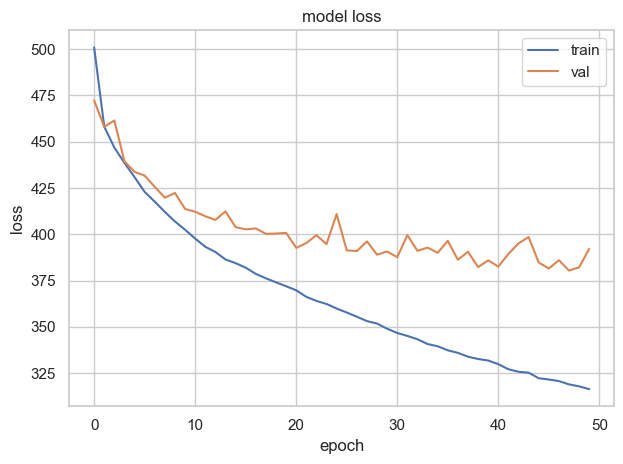

In [199]:
# Изменение лосса на тренировочном датасете
plt.plot(history.history['loss'])
# Изменение лосса на валидационном датасете
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.tight_layout()
plt.show()

Видно, что не всё так, как хотелось бы: *loss* слишком большой. Попробуем построить более сложную модель, добавив полносвязные слои. Теперь у нас **5** слоёв. Входной включает в себя **128** нейронов. Далее в каждом слое количество нейронов уменьшается в два раза, пока на выходном слое не достигает **1**.

In [197]:
# Построение модели
model = keras.Sequential([
        keras.layers.Dense(128, activation='relu', input_shape=(x_train.shape[1],)),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(16, activation='relu'),
        keras.layers.Dense(1)
])

# Компиляция модели
model.compile(optimizer='adam', loss='mean_squared_error')

# Обучение модели
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

# Нахождение лосса
loss = model.evaluate(x_test, y_test)
print(f'Test loss: {loss}')

891/891 ━━━━━━━━━━━━━━━━━━━━ 1s 566us/step - loss: 390.3095
Test loss: 392.4957580566406


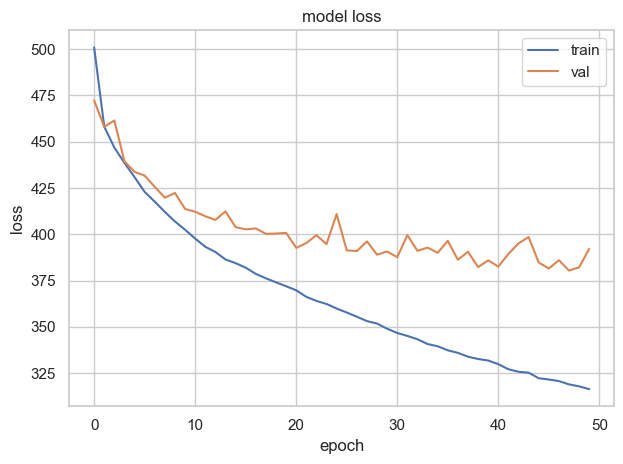

In [200]:
# Изменение лосса на тренировочном датасете
plt.plot(history.history['loss'])
# Изменение лосса на валидационном датасете
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.tight_layout()
plt.show()

Видим, что потенциал уменьшения *loss* большой, значит, можно ставить больше эпох. Попробуем обучить на **100** эпох.

In [201]:
# Построение модели
model = keras.Sequential([
        keras.layers.Dense(128, activation='relu', input_shape=(x_train.shape[1],)),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(16, activation='relu'),
        keras.layers.Dense(1)
])

# Компиляция модели
model.compile(optimizer='adam', loss='mean_squared_error')

# Обучение модели
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

# Нахождение лосса
loss = model.evaluate(x_test, y_test)
print(f'Test loss: {loss}')

891/891 ━━━━━━━━━━━━━━━━━━━━ 1s 708us/step - loss: 381.5886
Test loss: 387.8592224121094


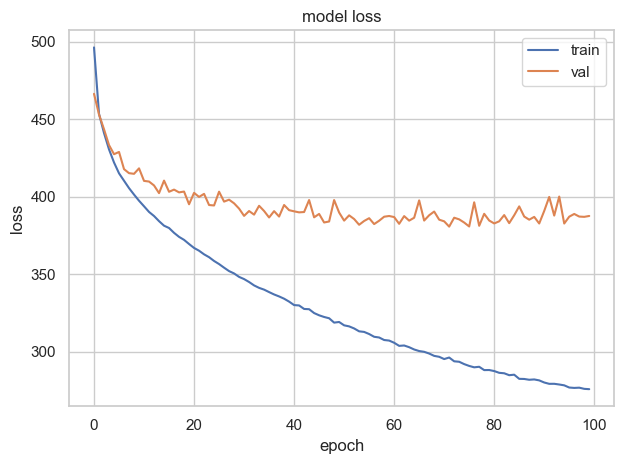

In [202]:
# Изменение лосса на тренировочном датасете
plt.plot(history.history['loss'])
# Изменение лосса на валидационном датасете
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.tight_layout()
plt.show()

Видим, что график тренировочного *loss* можно дальше понижать. Значит, можно усложнять модель. Попробую модель "горки": начнём с **16** входных нейронов, далее нейроны будут идти в таком порядке: **16, 32, 64, 128, 64, 32, 16, 1**. Обучаться поставим на **100** эпох.

In [206]:
# Построение модели
model = keras.Sequential([
        keras.layers.Dense(16, activation='relu', input_shape=(x_train.shape[1],)),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(16, activation='relu'),
        keras.layers.Dense(1)
])

# Компиляция модели
model.compile(optimizer='adam', loss='mean_squared_error')

# Обучение модели
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

# Нахождение лосса
loss = model.evaluate(x_test, y_test)
print(f'Test loss: {loss}')

891/891 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step - loss: 426.7622
Test loss: 431.7136535644531


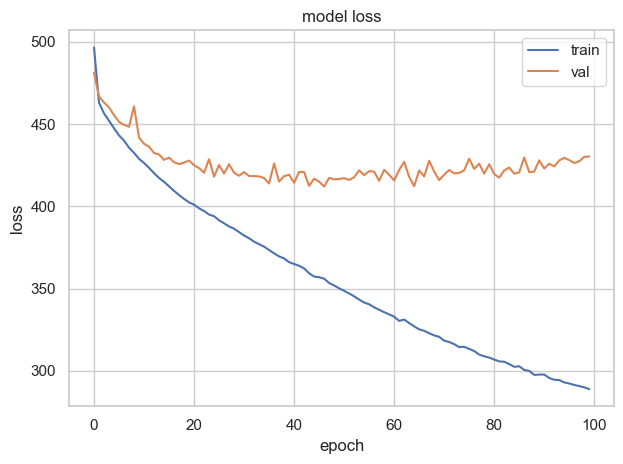

In [207]:
# Изменение лосса на тренировочном датасете
plt.plot(history.history['loss'])
# Изменение лосса на валидационном датасете
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.tight_layout()
plt.show()

Можно сделать два вывода:
1) Модель переобучается.
2) Модель нуждается в сглаживании весов.

Займёмся сглаживанием весов. Используем `l2-регуляризацию`. Она сглаживает веса по квадрату. У неё есть коэффициент, называемый `параметром регуляризации`. Поставим ему значение **0.01** и применим l2 к каждому слою.

In [ ]:
from keras.regularizers import l2

# Построение модели
model = keras.Sequential([
        keras.layers.Dense(16, activation='relu', input_shape=(x_train.shape[1],), kernel_regularizer=l2(0.01)),
        keras.layers.Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
        keras.layers.Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
        keras.layers.Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
        keras.layers.Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
        keras.layers.Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
        keras.layers.Dense(16, activation='relu', kernel_regularizer=l2(0.01)),
        keras.layers.Dense(1)
])

# Компиляция модели
model.compile(optimizer='adam', loss='mean_squared_error')

# Обучение модели
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

# Нахождение лосса
loss = model.evaluate(x_test, y_test)
print(f'Test loss: {loss}')

891/891 ━━━━━━━━━━━━━━━━━━━━ 1s 595us/step - loss: 413.2001
Test loss: 417.62713623046875


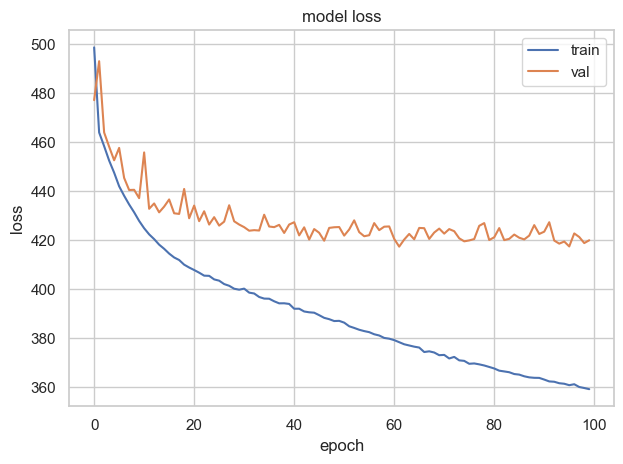

In [211]:
# Изменение лосса на тренировочном датасете
plt.plot(history.history['loss'])
# Изменение лосса на валидационном датасете
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.tight_layout()
plt.show()

Всё же, с глубиной модели перестарались. Вернём более старую модель, и не забудем применить к ней `l2-регуляризацию`. Также обучаем на **100** эпох.

In [212]:
# Построение модели
model = keras.Sequential([
        keras.layers.Dense(128, activation='relu', input_shape=(x_train.shape[1],), kernel_regularizer=l2(0.01)),
        keras.layers.Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
        keras.layers.Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
        keras.layers.Dense(16, activation='relu', kernel_regularizer=l2(0.01)),
        keras.layers.Dense(1)
])

# Компиляция модели
model.compile(optimizer='adam', loss='mean_squared_error')

# Обучение модели
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

# Нахождение лосса
loss = model.evaluate(x_test, y_test)
print(f'Test loss: {loss}')

891/891 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step - loss: 401.7522
Test loss: 407.0789489746094


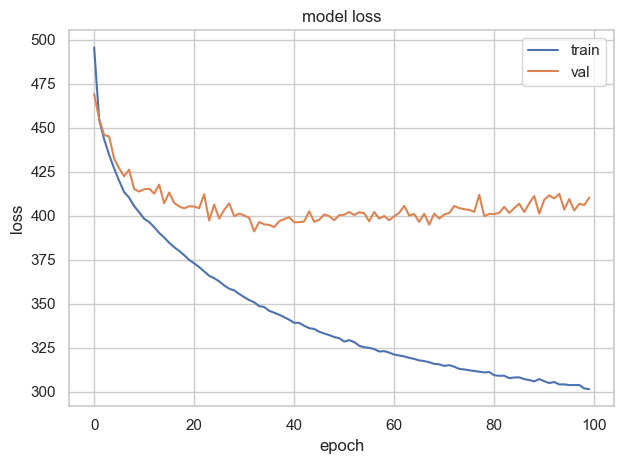

In [213]:
# Изменение лосса на тренировочном датасете
plt.plot(history.history['loss'])
# Изменение лосса на валидационном датасете
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.tight_layout()
plt.show()

Идёт большое переобучение. Используем `Dropout`. Он сбрасывает долю нейронов в слое, где он стоит. Таким образом мы будем бороться с переобучением. Коэффициент поставим на **0.2**.

In [214]:
# Построение модели
model = keras.Sequential([
        keras.layers.Dense(128, activation='relu', input_shape=(x_train.shape[1],), kernel_regularizer=l2(0.01)),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(16, activation='relu', kernel_regularizer=l2(0.01)),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(1)
])

# Компиляция модели
model.compile(optimizer='adam', loss='mean_squared_error')

# Обучение модели
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

# Нахождение лосса
loss = model.evaluate(x_test, y_test)
print(f'Test loss: {loss}')

891/891 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step - loss: 400.6492
Test loss: 404.4468078613281


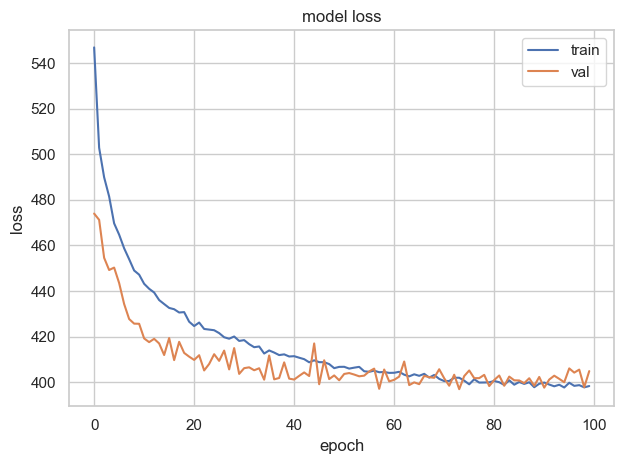

In [215]:
# Изменение лосса на тренировочном датасете
plt.plot(history.history['loss'])
# Изменение лосса на валидационном датасете
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.tight_layout()
plt.show()

Результат тестового *loss* нас не устроил. Уберём `l2-регуляризацию` и будем постепенно уменьшать коэффициент `Dropout`.

In [56]:
# Построение модели
model = keras.Sequential([
        keras.layers.Dense(128, activation='relu', input_shape=(x_train.shape[1],)),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dropout(0.1),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dropout(0.05),
        keras.layers.Dense(16, activation='relu'),
        keras.layers.Dense(1)
])


# Компиляция модели
model.compile(optimizer='adam', loss='mean_squared_error')

# Обучение модели
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

# Нахождение лосса
loss = model.evaluate(x_test, y_test)
print(f'Test loss: {loss}')

891/891 ━━━━━━━━━━━━━━━━━━━━ 1s 692us/step - loss: 364.1943
Test loss: 367.1569519042969


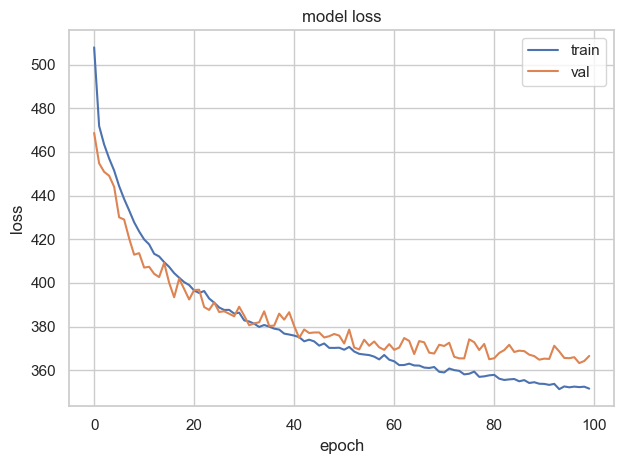

In [57]:
# Изменение лосса на тренировочном датасете
plt.plot(history.history['loss'])
# Изменение лосса на валидационном датасете
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.tight_layout()
plt.show()

Попробуем увеличить количество эпох, а также применить `EarlyStopping`- раннюю остановку. Она будет останавливать обучение, когда поймёт, что модель достигла переобучения.
Параметры:
* `monitor` - метрика, которую нужно отслеживать во время обучения.
* `patience` - количество эпох без улучшения метрики, после которых модель останавливается.
* `restore_best_weights` - указывает, должны ли лучшие веса модели быть восстановлены после остановки обучения.

In [61]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Построение модели
model = keras.Sequential([
        keras.layers.Dense(128, activation='relu', input_shape=(x_train.shape[1],)),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dropout(0.1),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dropout(0.05),
        keras.layers.Dense(16, activation='relu'),
        keras.layers.Dense(1)
])


# Компиляция модели
model.compile(optimizer='adam', loss='mean_squared_error')

# Обучение модели
history = model.fit(x_train, y_train, epochs=120, batch_size=16, validation_split=0.2, verbose=0, callbacks=[early_stopping])

# Нахождение лосса
loss = model.evaluate(x_test, y_test)
print(f'Test loss: {loss}')

891/891 ━━━━━━━━━━━━━━━━━━━━ 1s 683us/step - loss: 359.0352
Test loss: 362.5959777832031


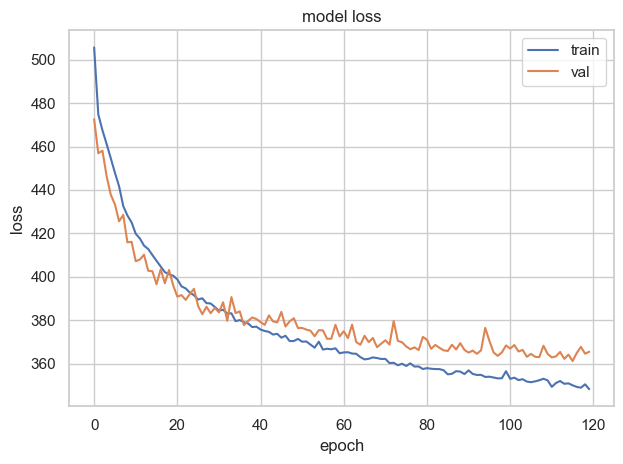

In [62]:
# Изменение лосса на тренировочном датасете
plt.plot(history.history['loss'])
# Изменение лосса на валидационном датасете
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.tight_layout()
plt.show()

После экспериментов с моделью остановился на этом - это лучшая модель, которую удалось получить. Её и зафиксируем.

Получим её метрики:

In [64]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


y_pred_nn = model.predict(x_test)

# Вычисление метрик
mae_nn = mean_absolute_error(y_test, y_pred_nn)
mse_nn = mean_squared_error(y_test, y_pred_nn)
rmse_nn = mse_nn ** 0.5
r2_nn = r2_score(y_test, y_pred_nn)

print('Метрики для нейронной сети:')
print(f'MAE: {mae_nn}')
print(f'MSE: {mse_nn}')
print(f'RMSE: {rmse_nn}')
print(f'R2: {r2_nn}')

891/891 ━━━━━━━━━━━━━━━━━━━━ 1s 638us/step
Метрики для нейронной сети:
MAE: 14.91286804773933
MSE: 362.5959736777412
RMSE: 19.04195299011478
R2: 0.2733661232224597


## 11. Сравнение моделей машинного обучения.

Сравнивать модели будем по выделенным метрикам. Сначала сравним модели по `MAE` - средней абсолютной ошибке. Чем меньше - тем лучше. Построим столбчатую диаграмму, чтобы наглядно это показать.

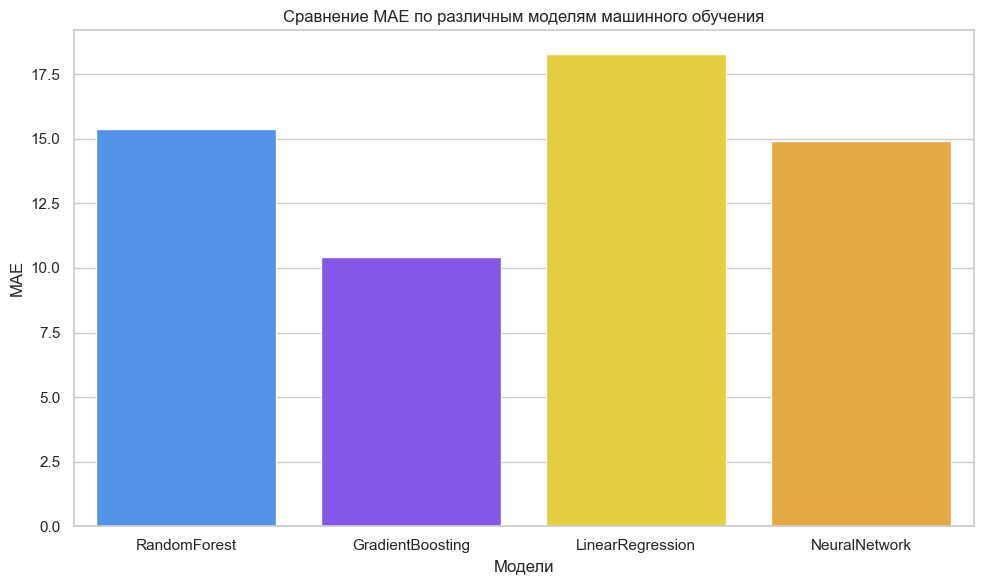

In [83]:
plt.figure(figsize=(10, 6))
bar_data = {
    'x' : ['RandomForest', 'GradientBoosting', 'LinearRegression', 'NeuralNetwork'],
    'y' : [mae_rf, mae_gb, mae_lr, mae_nn]
}

colors = ['#3C8EFF', '#7C3FFF', '#FFE129', '#FFAF29']

bar_df = pd.DataFrame(bar_data)
sns.barplot(x='x', y='y', data=bar_data, palette=colors)

plt.title('Сравнение MAE по различным моделям машинного обучения')
plt.xlabel('Модели')
plt.ylabel('MAE')

plt.tight_layout()
plt.show()

Рейтинг по `MAE`:
1) `GradientBoosting`
2) `NeuralNetwork`
3) `RandomForest`
4) `LinearRegression`

---

Сравнение по `MSE`. Чем меньше - тем лучше.

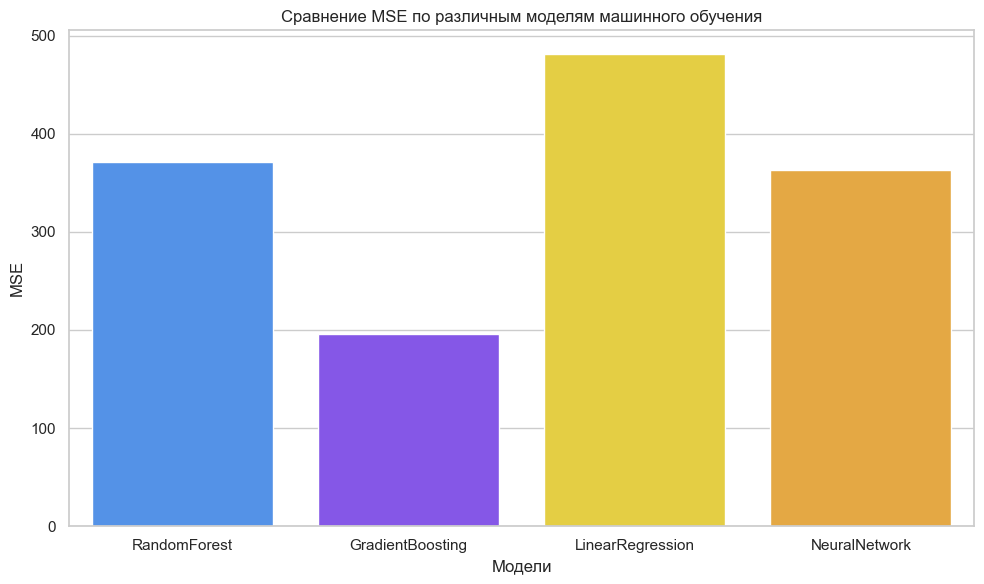

In [84]:
plt.figure(figsize=(10, 6))
bar_data = {
    'x' : ['RandomForest', 'GradientBoosting', 'LinearRegression', 'NeuralNetwork'],
    'y' : [mse_rf, mse_gb, mse_lr, mse_nn]
}

colors = ['#3C8EFF', '#7C3FFF', '#FFE129', '#FFAF29']

bar_df = pd.DataFrame(bar_data)
sns.barplot(x='x', y='y', data=bar_data, palette=colors)

plt.title('Сравнение MSE по различным моделям машинного обучения')
plt.xlabel('Модели')
plt.ylabel('MSE')

plt.tight_layout()
plt.show()

Рейтинг:
1) `GradientBoosting`
2) `NeuralNetwork`
3) `RandomForest`
4) `LinearRegression`

---

Сравнение по `RMSE`. Чем меньше - тем лучше.

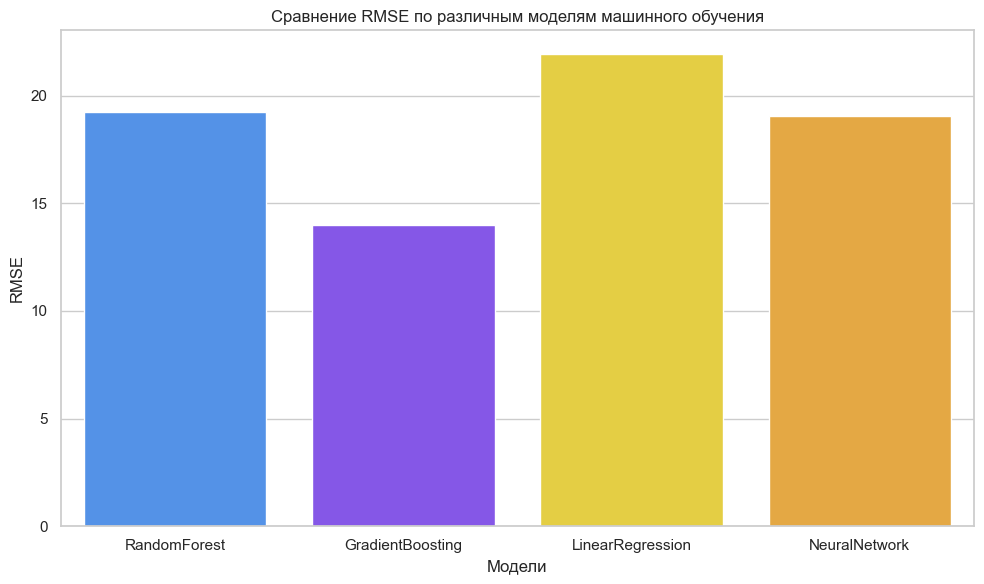

In [85]:
plt.figure(figsize=(10, 6))
bar_data = {
    'x' : ['RandomForest', 'GradientBoosting', 'LinearRegression', 'NeuralNetwork'],
    'y' : [rmse_rf, rmse_gb, rmse_lr, rmse_nn]
}

colors = ['#3C8EFF', '#7C3FFF', '#FFE129', '#FFAF29']

bar_df = pd.DataFrame(bar_data)
sns.barplot(x='x', y='y', data=bar_data, palette=colors)

plt.title('Сравнение RMSE по различным моделям машинного обучения')
plt.xlabel('Модели')
plt.ylabel('RMSE')

plt.tight_layout()
plt.show()

Рейтинг:
1) `GradientBoosting`
2) `NeuralNetwork`
3) `RandomForest`
4) `LinearRegression`

---

Сравнение по `R2`. Чем ближе к 1 - тем лучше.

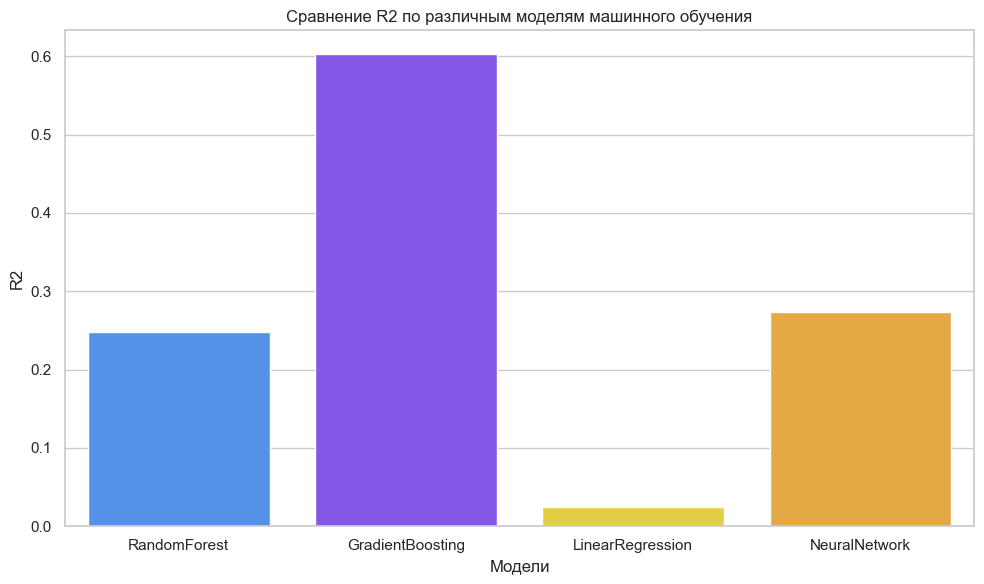

In [86]:
plt.figure(figsize=(10, 6))
bar_data = {
    'x' : ['RandomForest', 'GradientBoosting', 'LinearRegression', 'NeuralNetwork'],
    'y' : [r2_rf, r2_gb, r2_lr, r2_nn]
}

colors = ['#3C8EFF', '#7C3FFF', '#FFE129', '#FFAF29']

bar_df = pd.DataFrame(bar_data)
sns.barplot(x='x', y='y', data=bar_data, palette=colors)

plt.title('Сравнение R2 по различным моделям машинного обучения')
plt.xlabel('Модели')
plt.ylabel('R2')

plt.tight_layout()
plt.show()

**Вывод**: лучшая модель - `Gradient Boosting Regressor` по всем метрикам.

## 12. Cross Validation

Теперь необходимо провести `Cross Validation` - кросс-валидацию. Мы делим выборку на 5 частей, каждая называется фолдом. На каждом фолде мы обучаем модель и получаем метрики. Так мы получим значение нужных метрик.

In [55]:
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Модель градиентного бустинга
gradient_boosting = GradientBoostingRegressor(
                    learning_rate=0.01,
                    n_estimators=1000,
                    max_depth=10, 
                    min_samples_split=5,
                    min_samples_leaf=2,
                    alpha=0.1
                    )

# 5 фолдов
kf = KFold(n_splits=5)
for fold_number, (train_fold_index, test_fold_index) in enumerate(kf.split(x_train), start=1):
    # Расделяем на тренировочную и тестовую выборки.
    x_train_fold, x_test_fold = x_train.iloc[train_fold_index], x_train.iloc[test_fold_index]
    y_train_fold, y_test_fold = y.iloc[train_fold_index], y.iloc[test_fold_index]

    # Обучаем модель
    gradient_boosting.fit(x_train_fold, y_train_fold)

    # Прогнозирование на тестовой выборке
    y_pred = gradient_boosting.predict(x_test_fold)
    # Вычисление метрик
    mae = mean_absolute_error(y_test_fold, y_pred)
    mse = mean_squared_error(y_test_fold, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_test_fold, y_pred)

    print(f'Номер фолда: {fold_number}')
    print(f'MAE: {mae:.2f}')
    print(f'MSE: {mse:.2f}')
    print(f'RMSE: {rmse:.2f}')
    print(f'R2: {r2:.2f}')
    print('\n')

Номер фолда: 1
MAE: 19.22
MSE: 489.11
RMSE: 22.12
R2: -0.02


Номер фолда: 2
MAE: 20.07
MSE: 547.28
RMSE: 23.39
R2: -0.02


Номер фолда: 3
MAE: 16.10
MSE: 391.03
RMSE: 19.77
R2: -0.03


Номер фолда: 4
MAE: 23.05
MSE: 668.83
RMSE: 25.86
R2: -0.08


Номер фолда: 5
MAE: 19.06
MSE: 512.42
RMSE: 22.64
R2: -0.13




**Итого метрики кросс-валидации:**
* **MAE**: ОТ 16.10 ДО 23.05
* **MSE**: ОТ 391.03 ДО 668.83
* **RMSE**: ОТ 19.77 ДО 25.86
* **R2**: ОТ -0.08 ДО -0.13

## 13. Выводы работы

`MAE`, `MSE` и `RMSE` на кросс-валидации показывают значительный разброс по сравнению с метриками после обучения. `R2` после обучения имела хорошие показатели (`~0.6`), но на кросс-валидации имеет отрицательные значения. **Вывод: модель не справляется с новыми данными. Модель переобучена.**  

Как исправить переобучение? Можно уменьшить сложность модели или применить техники регуляризации (`Lasso`, `Elastic Net`). Также нужны более качественные данные.

**Данные.** С ними большая проблема. Ни один признак должным образом не коррелирует с таргетной переменной. Как бы я не старался создать более-менее полезные признаки, но не вышло, так как изначальный материал почти бесполеззен. О чём это говорит? **Об отсутствии репрезентативности данных.** Возможно, популярность зависит от рекламы, продвижения, но такими данными мы не располагаем.

Какая же работа была проделана?
1) Был проанализирован датасет (дважды).
2) Были созданы новые признаки.
3) Была проведена `Permutation Importance` - важность перестановок.
4) Были созданы 4 модели машинного обучения - `Random Forest Regressor`, `Gradient Boosting Regressor`, `Linear Regression`, `Neural Network`. Самой лучшей оказалась `Gradient Boosting Regressor`.
5) Была проведена `Cross Validation`. Результаты оказались неудовлетворительными из-за отсутствия репрезентативности данных и переобучения модели.

**Спасибо за внимание!**

## 14. Эксперименты

Заметим, что среди песен много тех, чьи популярности равны `0`. Посмотрим, сколько же это.

In [ ]:
norm_data_result[norm_data_result['popularity']==0].shape

(16019, 19)

Увидим, сколько это в процентах от количества всех песен.

In [74]:
procent = len(norm_data_result[norm_data_result['popularity']==0])/len(norm_data_result)*100
print(f'Процент песен с нулевой популярностью: {procent:.2f}')

Процент песен с нулевой популярностью: 14.05


Видим, что примерно `14%` песен имеют нулевую популярность. Это сбивает модель. Попробуем от них избавиться. 

In [53]:
norm_data_no_zero = norm_data_result.drop(norm_data_result[norm_data_result['popularity']==0].index)
norm_data_no_zero

,artists,album_name,track_name,popularity,duration_min,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo,track_genre,high_danceability,low_valence,low_instrum,high_loudness,high_tempo
0,10357,8100,11741,73,3.8,0.676,0.4610,-6.746,0.1430,0.0322,0.000001,0.7150,87.917,0,1,0,1,1,0
1,3287,14796,22528,55,2.5,0.420,0.1660,-17.235,0.0763,0.9240,0.000006,0.2670,77.489,0,0,1,1,0,0
2,12397,39162,60774,57,3.5,0.438,0.3590,-9.734,0.0557,0.2100,0.000000,0.1200,76.332,0,0,1,1,0,0
3,14839,8580,9580,71,3.4,0.266,0.0596,-18.515,0.0363,0.9050,0.000071,0.1430,181.740,0,0,1,1,0,1
4,5255,16899,25689,82,3.3,0.618,0.4430,-9.681,0.0526,0.4690,0.000000,0.1670,119.949,0,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113994,22486,66,53329,21,6.4,0.172,0.2350,-16.393,0.0422,0.6400,0.928000,0.0339,125.995,113,0,1,0,0,1
113995,22486,66,65090,22,6.4,0.174,0.1170,-18.318,0.0401,0.9940,0.976000,0.0350,85.239,113,0,1,0,0,0
113996,4952,5028,38207,22,4.5,0.629,0.3290,-10.895,0.0420,0.8670,0.000000,0.7430,132.378,113,1,0,1,0,1
113997,18534,7238,21507,41,4.7,0.587,0.5060,-10.889,0.0297,0.3810,0.000000,0.4130,135.960,113,1,1,1,0,1


Далее попробуем обучить модель `Gradient Boosting Regressor` на данном датасете с теми же параметрами и посмотрим на метрики.

Для начала разделим данные:

In [55]:
x = norm_data_no_zero.drop(['popularity'], axis=1)
y = norm_data_no_zero['popularity']

x_train, x_test, y_train, y_test = train_test_split(x, y, shuffle=True)

Теперь обучим модель:

In [87]:
from sklearn.ensemble import GradientBoostingRegressor

gradient_boosting = GradientBoostingRegressor(
                    learning_rate=0.01,
                    n_estimators=1000,
                    max_depth=10, 
                    min_samples_split=5,
                    min_samples_leaf=2,
                    alpha=0.1
                    )
gradient_boosting.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.1, learning_rate=0.01, max_depth=10,
                          min_samples_leaf=2, min_samples_split=5,
                          n_estimators=1000)

Посмотрим метрики:

In [89]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Прогнозирование на тестовой выборке
y_pred_gb = gradient_boosting.predict(x_test)

# Вычисление метрик
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = mse_gb ** 0.5
r2_gb = r2_score(y_test, y_pred_gb)

print('Метрики для регрессии градиентного бустинга:')
print(f'MAE: {mae_gb}')
print(f'MSE: {mse_gb}')
print(f'RMSE: {rmse_gb}')
print(f'R2: {r2_gb}')

Метрики для регрессии градиентного бустинга:
MAE: 9.165026035989017
MSE: 154.95928880466602
RMSE: 12.448264489665458
R2: 0.5820706346278504


Получившиеся метрики:

* `MAE`: 9.165026035989017
* `MSE`: 154.95928880466602
* `RMSE`: 12.448264489665458
* `R2`: 0.5820706346278504

Метрики на стандартном датасете были:

* `MAE`: 10.418085826969408
* `MSE`: 198.6361513257299
* `RMSE`: 14.093833805098239
* `R2`: 0.5983714610997592

Видим, что метрики примерно одинаковые, на основе чего можем сделать вывод, что, если убрать песни с `popularity = 0`, то ничего не изменится.

Попробуем провести `Cross Validation` для нового датасета.

In [56]:
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Модель градиентного бустинга
gradient_boosting = GradientBoostingRegressor(
                    learning_rate=0.01,
                    n_estimators=1000,
                    max_depth=10, 
                    min_samples_split=5,
                    min_samples_leaf=2,
                    alpha=0.1
                    )

# 5 фолдов
kf = KFold(n_splits=5)
for fold_number, (train_fold_index, test_fold_index) in enumerate(kf.split(x_train), start=1):
    # Расделяем на тренировочную и тестовую выборки.
    x_train_fold, x_test_fold = x_train.iloc[train_fold_index], x_train.iloc[test_fold_index]
    y_train_fold, y_test_fold = y.iloc[train_fold_index], y.iloc[test_fold_index]

    # Обучаем модель
    gradient_boosting.fit(x_train_fold, y_train_fold)

    # Прогнозирование на тестовой выборке
    y_pred = gradient_boosting.predict(x_test_fold)
    # Вычисление метрик
    mae = mean_absolute_error(y_test_fold, y_pred)
    mse = mean_squared_error(y_test_fold, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_test_fold, y_pred)

    print(f'Номер фолда: {fold_number}')
    print(f'MAE: {mae:.2f}')
    print(f'MSE: {mse:.2f}')
    print(f'RMSE: {rmse:.2f}')
    print(f'R2: {r2:.2f}')
    print('\n')

Номер фолда: 1
MAE: 16.72
MSE: 378.84
RMSE: 19.46
R2: -0.02


Номер фолда: 2
MAE: 17.54
MSE: 429.56
RMSE: 20.73
R2: -0.02


Номер фолда: 3
MAE: 13.98
MSE: 294.12
RMSE: 17.15
R2: -0.04


Номер фолда: 4
MAE: 20.19
MSE: 534.73
RMSE: 23.12
R2: -0.03


Номер фолда: 5
MAE: 15.87
MSE: 358.30
RMSE: 18.93
R2: -0.13




Можно заметить, что и тут метрики почти не отличаются от кросс-валидации с полным датасетом. ИЗ чего делаем вывод, что избавление от пеесен с нулевой популярностью никак не улучшает ситуацию.